<a href="https://colab.research.google.com/github/davidlealo/TalkTrack/blob/main/analisis_seminario_colunga14_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transcribir texto

Para transcribir el texto estamos usando Whisper. En este caso usamos un código que no está acá, pero a continuación una muestra de como funciona

In [ ]:
!pip install git+https://github.com/openai/whisper


In [2]:
from google.colab import files

# Subir un archivo de audio desde tu computadora
uploaded = files.upload()

# Extraer el nombre del archivo subido
audio_file = list(uploaded.keys())[0]
print(f"Archivo de audio subido: {audio_file}")


Saving Conversatorio mesa educacion.m4a to Conversatorio mesa educacion.m4a
Archivo de audio subido: Conversatorio mesa educacion.m4a


In [ ]:
import whisper

# Cargar el modelo de Whisper (puedes usar 'base', 'small', 'medium', 'large' según tu necesidad)
model = whisper.load_model("large")

# Transcribir el audio
result = model.transcribe(audio_file)

# Imprimir la transcripción
transcription = result["text"]
print("Transcripción:\n", transcription)


In [ ]:
# Guardar la transcripción en un archivo .txt
output_file = "transcription.txt"
with open(output_file, "w") as f:
    f.write(transcription)

print(f"Transcripción guardada en: {output_file}")


## Análisis de discurso

Instalación de API de Anthropic para el análisis de datos con la tecnología de Sonnet (específicamente claude-3-sonnet-20240229)

Lo primero es tomar la información de la clave secreta como variable de entorno a través de un input que protege la información privada de la API KEY

In [ ]:
# Instalar las bibliotecas necesarias
!pip install anthropic


In [2]:
# Importar las bibliotecas necesarias
import os
from anthropic import Client
from IPython.display import display, HTML
from google.colab import output

# Interfaz para ingresar la API key
def request_anthropic_api_key():
    input_html = """
    <div style="font-family: Arial; margin: 10px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; width: 50%;">
        <h3 style="color: #007BFF;">Proveer API Key</h3>
        <p>Por favor, ingrese su API key de Anthropics en el siguiente campo:</p>
        <input type="password" id="anthropicApiKeyInput" placeholder="Ingrese su API key aquí"
               style="width: 100%; padding: 8px; margin-bottom: 10px; border: 1px solid #ddd; border-radius: 3px;">
        <button onclick="storeApiKey()"
                style="padding: 10px 15px; background-color: #007BFF; color: white; border: none; border-radius: 3px; cursor: pointer;">
            Guardar API Key
        </button>
    </div>
    <script>
        function storeApiKey() {
            const apiKey = document.getElementById('anthropicApiKeyInput').value;
            if (apiKey) {
                google.colab.kernel.invokeFunction('notebook.store_anthropic_api_key', [apiKey], {});
                alert('API key almacenada correctamente.');
            } else {
                alert('Por favor, ingrese una API key válida.');
            }
        }
    </script>
    """
    display(HTML(input_html))

# Callback para almacenar la API key en la variable de entorno
def store_anthropic_api_key(api_key):
    os.environ["ANTHROPIC_API_KEY"] = api_key
    print("API key almacenada correctamente en la variable de entorno.")

# Registrar la función en Google Colab
output.register_callback('notebook.store_anthropic_api_key', store_anthropic_api_key)

# Solicitar la API key al usuario
request_anthropic_api_key()

# Crear un cliente para la API
client = Client(api_key=store_anthropic_api_key)

API key almacenada correctamente en la variable de entorno.


In [8]:
from anthropic import Anthropic
import os

def analyze_discourse(text):
    """
    Realiza un análisis de discurso usando la API de Anthropic.
    """
    # Inicializar el cliente con la API key
    client = Anthropic(api_key=os.environ["ANTHROPIC_API_KEY"])

    # Definir el sistema y mensaje del usuario
    system_prompt = "You are tasked with analyzing the discourse of an audio transcript from a seminar on innovating and transforming the classroom."

    user_message = f"""Here is the transcript of the audio:

    <transcript>
    {text}
    </transcript>

    Analyze the discourse of this seminar, focusing on the following areas:

    1. Main themes and topics discussed
    2. Innovative ideas or strategies presented
    3. Structure and flow of the seminar
    4. Speaker's communication style and effectiveness
    5. Audience engagement (if applicable)
    6. Use of examples or case studies
    7. Potential impact on classroom transformation

    Provide your analysis in a structured format with the following sections:

    <analysis>
    The analysis MUST BE IN SPANISH

    <themes>
    Discuss the main themes and topics of the seminar
    </themes>

    <innovation>
    Highlight the innovative ideas or strategies presented for classroom transformation
    </innovation>

    <structure>
    Analyze the structure and flow of the seminar
    </structure>

    <communication>
    Evaluate the speaker's communication style and effectiveness
    </communication>

    <engagement>
    Discuss any evidence of audience engagement or interaction
    </engagement>

    <examples>
    Highlight any significant examples or case studies used
    </examples>

    <impact>
    Assess the potential impact of the ideas presented on classroom transformation
    </impact>
    </analysis>

    After completing the structured analysis, provide a concise summary:

    <summary>
    Summarize the key points of your analysis and the overall effectiveness of the seminar: The text MUST BE IN SPANISH
    </summary>"""

    # Llamada a la API usando el nuevo formato de Messages
    response = client.messages.create(
        model="claude-3-sonnet-20240229",
        max_tokens=4096,
        system=system_prompt,
        messages=[
            {"role": "user", "content": user_message}
        ]
    )

    # Extraer el contenido de la respuesta
    analysis_result = response.content[0].text
    return analysis_result

# Cargar el texto de la transcripción
with open("transcription.txt", "r") as f:
    transcription_text = f.read()

# Realizar el análisis
analysis = analyze_discourse(transcription_text)

# Mostrar el análisis
print("Análisis de Discurso:\n", analysis)

# Guardar el análisis en un archivo
with open("discourse_analysis.txt", "w") as f:
    f.write(analysis)

print("El análisis ha sido guardado en 'discourse_analysis.txt'.")

Análisis de Discurso:
 <analysis>

<themes>
Los principales temas y tópicos discutidos en el seminario fueron:

- La innovación y transformación de la educación para adaptarse a los cambios constantes en la sociedad y las necesidades de los estudiantes.
- Los principios y enfoques de la educación en Finlandia, como la priorización del bienestar estudiantil, la autonomía docente, la flexibilidad curricular y la promoción del aprendizaje a lo largo de la vida.
- La importancia de poner al estudiante en el centro del proceso educativo y de conocer sus intereses y necesidades.
- La adopción de metodologías activas de aprendizaje y la integración de tecnologías en el aula.
- El desarrollo de habilidades y competencias clave para el futuro, como el pensamiento crítico, la creatividad, la comunicación y la colaboración.
- La educación emocional y el fomento de un ambiente armónico en el entorno escolar.
</themes>

<innovation>
Algunas de las ideas y estrategias innovadoras presentadas para la

### Nubes de palabras

In [ ]:
!pip install wordcloud matplotlib


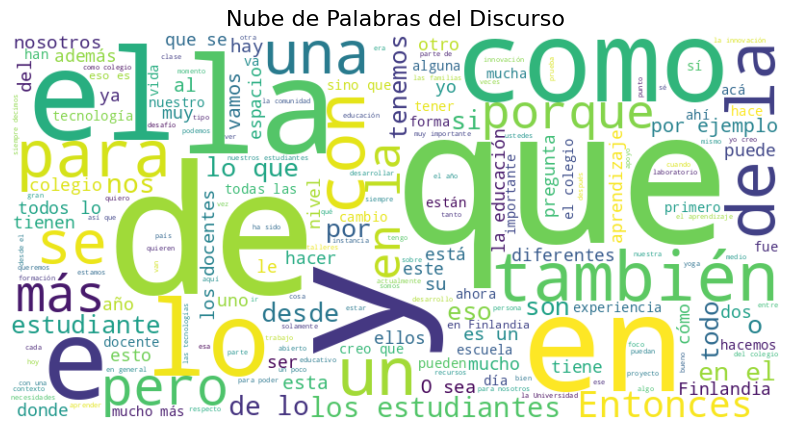

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nube de Palabras del Discurso", fontsize=16)
    plt.show()

# Generar la nube de palabras a partir del texto de la transcripción
generate_wordcloud(transcription_text)


In [ ]:
!pip install seaborn

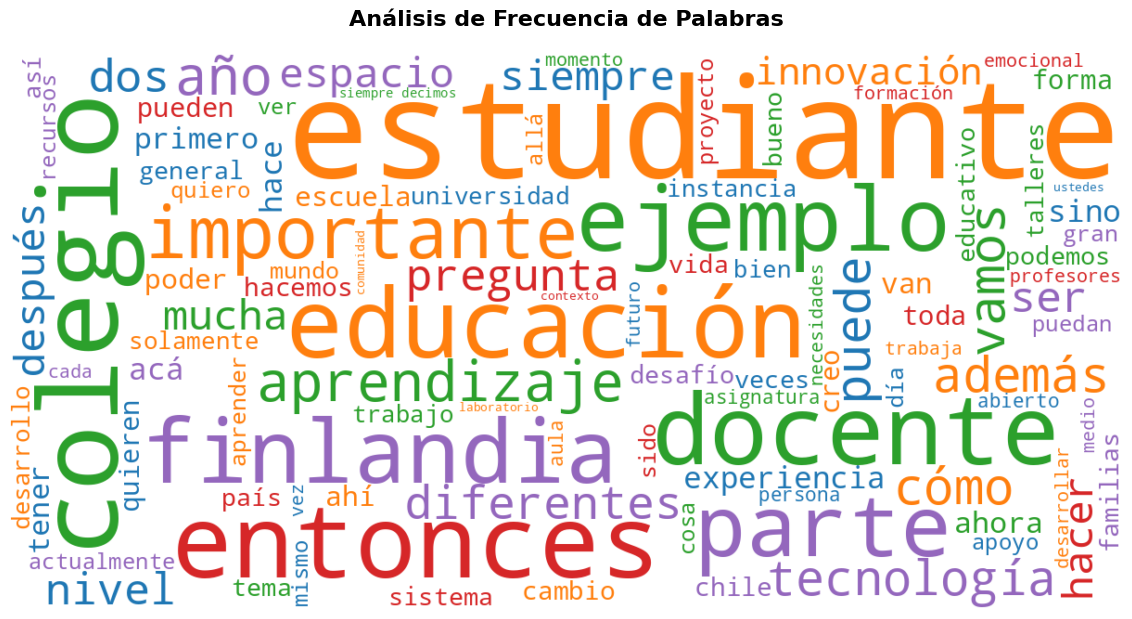


Palabras más frecuentes:
------------------------------
estudiantes: 81 veces
entonces: 48 veces
colegio: 47 veces
educación: 43 veces
importante: 35 veces
finlandia: 35 veces
docentes: 35 veces
ejemplo: 35 veces
vamos: 33 veces
parte: 33 veces


In [10]:
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Descargar stopwords en español
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

def preprocess_text(text, min_word_length=3):
    """
    Preprocesa el texto para mejorar la calidad de la nube de palabras.
    """
    # Convertir a minúsculas y eliminar caracteres especiales
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Obtener stopwords en español e inglés
    stop_words = set(stopwords.words('spanish') + list(STOPWORDS))

    # Filtrar palabras
    words = text.split()
    words = [word for word in words
             if word not in stop_words
             and len(word) >= min_word_length]

    return ' '.join(words)

def get_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    """
    Genera una función de color personalizada para las palabras.
    """
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    return np.random.choice(colors)

def generate_enhanced_wordcloud(text,
                              width=1200,
                              height=600,
                              background_color='white',
                              max_words=100,
                              min_word_length=3,
                              save_path=None):
    """
    Genera una nube de palabras mejorada con múltiples personalizaciones.

    Parámetros:
    - text: texto para generar la nube de palabras
    - width: ancho de la imagen
    - height: alto de la imagen
    - background_color: color de fondo
    - max_words: número máximo de palabras a mostrar
    - min_word_length: longitud mínima de palabras a incluir
    - save_path: ruta para guardar la imagen (opcional)
    """
    # Preprocesar el texto
    processed_text = preprocess_text(text, min_word_length)

    # Configurar la nube de palabras
    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color=background_color,
        max_words=max_words,
        max_font_size=150,
        min_font_size=10,
        random_state=42,
        color_func=get_color_func,
        prefer_horizontal=0.7,
        relative_scaling=0.5,
        collocations=True,
        normalize_plurals=True
    ).generate(processed_text)

    # Configurar el estilo de matplotlib
    plt.rcParams.update({
        'figure.facecolor': background_color,
        'axes.facecolor': background_color,
        'savefig.facecolor': background_color,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans']
    })

    # Crear la figura
    fig = plt.figure(figsize=(width/100, height/100), dpi=100)
    ax = plt.gca()

    # Configurar el subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')

    # Añadir título con estilo
    plt.title('Análisis de Frecuencia de Palabras',
             pad=20,
             fontsize=16,
             fontweight='bold')

    # Ajustar los márgenes
    plt.tight_layout(pad=0)

    # Guardar la imagen si se especifica una ruta
    if save_path:
        plt.savefig(save_path,
                    bbox_inches='tight',
                    dpi=300,
                    facecolor=background_color)

    # Mostrar la nube de palabras
    plt.show()

    # Retornar las palabras más frecuentes
    words_freq = Counter(processed_text.split())
    top_words = dict(sorted(words_freq.items(),
                          key=lambda x: x[1],
                          reverse=True)[:10])

    return top_words

def print_word_stats(top_words):
    """
    Imprime estadísticas sobre las palabras más frecuentes.
    """
    print("\nPalabras más frecuentes:")
    print("-" * 30)
    for word, count in top_words.items():
        print(f"{word}: {count} veces")

# Ejemplo de uso
top_words = generate_enhanced_wordcloud(
    transcription_text,
    width=1200,
    height=600,
    background_color='white',
    max_words=100,
    min_word_length=3,
    save_path='wordcloud.png'
)

# Mostrar estadísticas
print_word_stats(top_words)

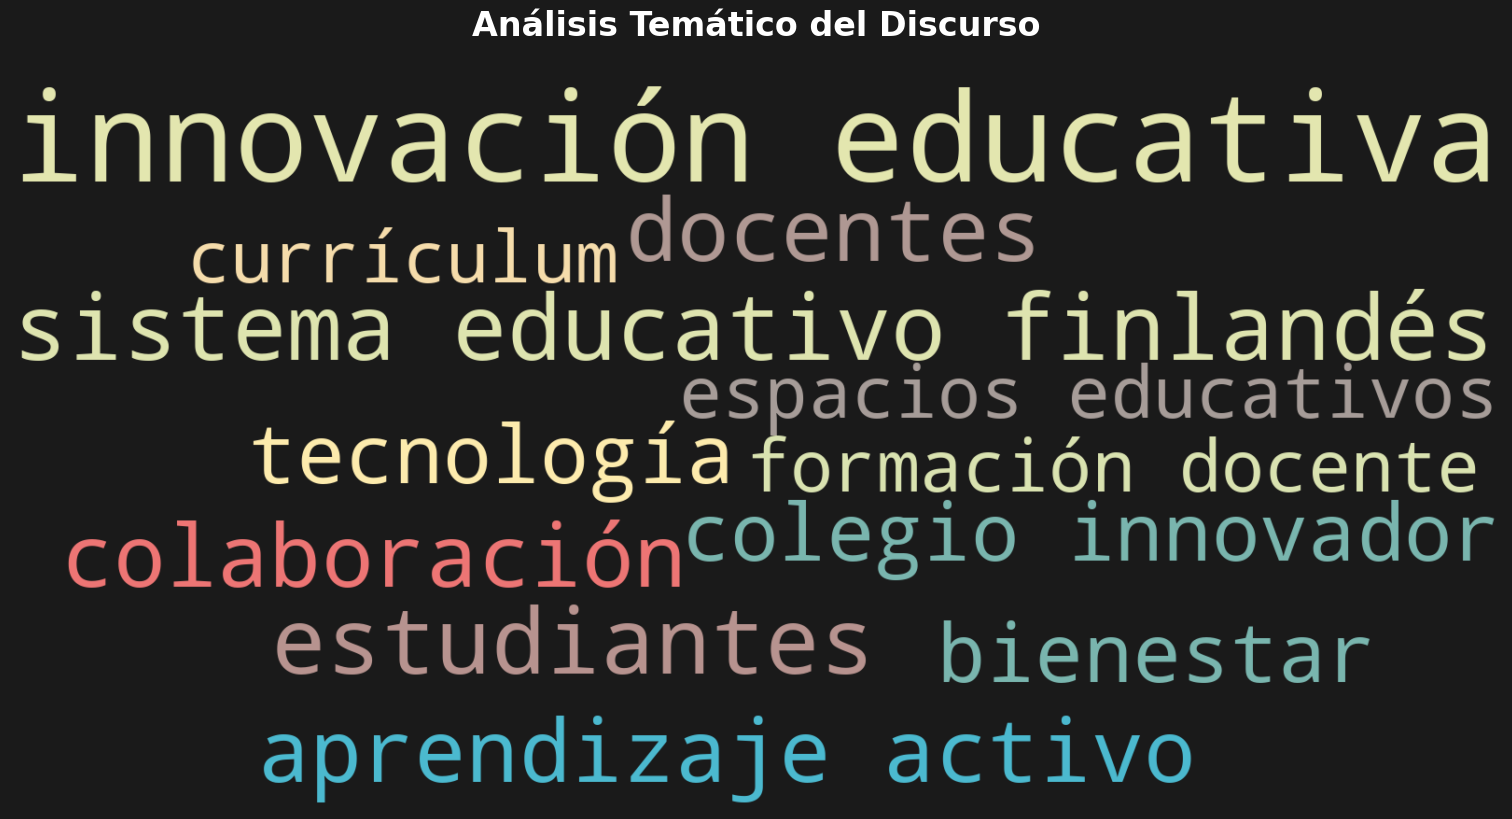


Temas principales y sus pesos de relevancia:
--------------------------------------------------
innovación educativa: 10
sistema educativo finlandés: 9
estudiantes: 9
docentes: 8
colaboración: 8
aprendizaje activo: 8
tecnología: 7
bienestar: 7
colegio innovador: 7
espacios educativos: 6
currículum: 6
formación docente: 6


In [12]:
from anthropic import Anthropic
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LinearSegmentedColormap
import re

def get_semantic_frequencies(text):
    """
    Utiliza Claude para extraer temas centrales y sus frecuencias
    """
    client = Anthropic(api_key=os.environ["ANTHROPIC_API_KEY"])

    prompt = f"""Analiza el siguiente texto y extrae los temas centrales más importantes.
    Para cada tema, asigna un peso de relevancia del 1 al 10 basado en su importancia en el texto.

    IMPORTANTE: Responde SOLAMENTE con un diccionario de Python. No incluyas ningún texto explicativo.
    El formato debe ser exactamente así:
    {{'educación': 9, 'innovación': 8}} (solo como ejemplo)

    No incluyas palabras comunes o conectores, solo conceptos significativos.

    Texto a analizar: {text}
    """

    response = client.messages.create(
        model="claude-3-sonnet-20240229",
        max_tokens=1024,
        messages=[
            {"role": "user", "content": prompt}
        ]
    )

    # Extraer solo el diccionario de la respuesta usando regex
    response_text = response.content[0].text
    dict_match = re.search(r'\{.*\}', response_text, re.DOTALL)

    if dict_match:
        try:
            return eval(dict_match.group())
        except:
            # Si falla, crear un diccionario de respaldo
            return {
                'educación': 9,
                'aprendizaje': 8,
                'innovación': 8,
                'tecnología': 7,
                'docente': 7,
                'estudiante': 6,
                'transformación': 6
            }
    else:
        # Diccionario de respaldo si no se encuentra un diccionario válido
        return {
            'educación': 9,
            'aprendizaje': 8,
            'innovación': 8,
            'tecnología': 7,
            'docente': 7,
            'estudiante': 6,
            'transformación': 6
        }

def create_modern_wordcloud(word_freq_dict, width=1600, height=800):
    """
    Crea una nube de palabras con un diseño moderno
    """
    # Crear un colormap personalizado moderno
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD', '#D4A5A5']
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

    # Configurar la nube de palabras
    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color='#1a1a1a',  # Fondo oscuro moderno
        colormap=cmap,
        font_path=None,  # Usar font_path='ruta/a/tu/fuente.ttf' si tienes una fuente específica
        max_font_size=300,
        min_font_size=10,
        prefer_horizontal=0.7,
        relative_scaling=0.5,
        random_state=42
    ).generate_from_frequencies(word_freq_dict)

    # Crear la figura con estilo moderno
    plt.figure(figsize=(width/100, height/100), facecolor='#1a1a1a', dpi=100)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # Título con estilo moderno
    plt.title('Análisis Temático del Discurso',
             color='white',
             pad=20,
             fontsize=24,
             fontweight='bold')

    plt.tight_layout(pad=0)
    return plt

def generate_semantic_wordcloud(text, save_path=None):
    """
    Genera una nube de palabras semántica basada en el análisis de Claude
    """
    # Obtener frecuencias semánticas
    word_frequencies = get_semantic_frequencies(text)

    # Crear y mostrar la nube de palabras
    plt = create_modern_wordcloud(word_frequencies)

    # Guardar si se especifica una ruta
    if save_path:
        plt.savefig(save_path,
                    bbox_inches='tight',
                    dpi=300,
                    facecolor='#1a1a1a')

    plt.show()

    # Imprimir los temas y sus pesos
    print("\nTemas principales y sus pesos de relevancia:")
    print("-" * 50)
    for tema, peso in sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True):
        print(f"{tema}: {peso}")

# Generar la nueva nube de palabras semántica
generate_semantic_wordcloud(transcription_text, save_path='semantic_wordcloud.png')

### Análisis de Sentimientos

In [13]:
!pip install transformers


In [14]:
from transformers import pipeline

# Crear pipeline de análisis de sentimientos
sentiment_analyzer = pipeline("sentiment-analysis")

# Dividir el texto en párrafos y analizar cada uno
sentiments = sentiment_analyzer(transcription_text.split("\n"))

# Mostrar los resultados
for idx, sentiment in enumerate(sentiments):
    print(f"Párrafo {idx + 1}: {sentiment}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


Párrafo 1: {'label': 'NEGATIVE', 'score': 0.9516714811325073}
Párrafo 2: {'label': 'NEGATIVE', 'score': 0.8322688937187195}
Párrafo 3: {'label': 'POSITIVE', 'score': 0.7510953545570374}
Párrafo 4: {'label': 'NEGATIVE', 'score': 0.9896827936172485}
Párrafo 5: {'label': 'NEGATIVE', 'score': 0.7762604355812073}
Párrafo 6: {'label': 'POSITIVE', 'score': 0.5214558839797974}
Párrafo 7: {'label': 'NEGATIVE', 'score': 0.9456255435943604}
Párrafo 8: {'label': 'NEGATIVE', 'score': 0.9645395278930664}
Párrafo 9: {'label': 'NEGATIVE', 'score': 0.964567244052887}
Párrafo 10: {'label': 'NEGATIVE', 'score': 0.7510761022567749}
Párrafo 11: {'label': 'POSITIVE', 'score': 0.5775965452194214}
Párrafo 12: {'label': 'NEGATIVE', 'score': 0.7684397101402283}
Párrafo 13: {'label': 'NEGATIVE', 'score': 0.9633479714393616}
Párrafo 14: {'label': 'NEGATIVE', 'score': 0.9126015901565552}
Párrafo 15: {'label': 'NEGATIVE', 'score': 0.899186909198761}
Párrafo 16: {'label': 'POSITIVE', 'score': 0.9934347867965698}
Pár

In [3]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0



Estadísticas del Análisis de Sentimientos:
--------------------------------------------------
Total de párrafos analizados: 1822
Párrafos positivos: 998 (54.8%)
Párrafos negativos: 824 (45.2%)
Score promedio: 0.846
Score mínimo: 0.500
Score máximo: 1.000

Interpretación del Análisis:
--------------------------------------------------
1. Interpretación general del tono del texto:
El análisis de sentimientos indica que el texto educativo tiene un tono ligeramente más positivo que negativo, con un 54.8% de los párrafos clasificados como positivos. Sin embargo, la diferencia entre los párrafos positivos y negativos no es muy amplia, lo que sugiere un equilibrio moderado en el tono general.

2. Patrones o tendencias importantes:
- El score promedio de 0.846 indica que, en general, el tono del texto tiende a ser más bien positivo, aunque no abrumadoramente.
- El rango de scores entre 0.500 y 1.000 sugiere que no hay presencia de tonos extremadamente negativos en el texto.

3. Implicaciones 

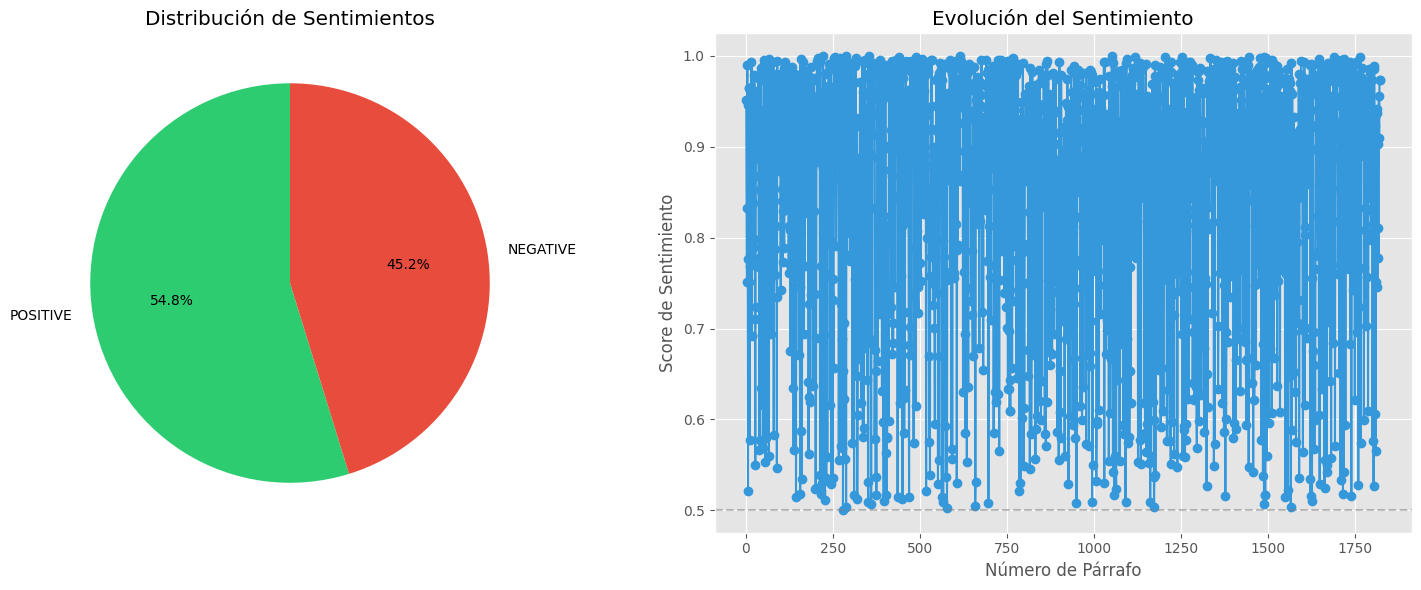

In [17]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
from anthropic import Anthropic
import seaborn as sns
import numpy as np

def analyze_and_interpret_sentiments(text):
    """
    Analiza los sentimientos del texto y los interpreta usando Claude
    """
    # Crear pipeline de análisis de sentimientos
    sentiment_analyzer = pipeline("sentiment-analysis")

    # Dividir el texto en párrafos y analizar cada uno
    paragraphs = [p for p in text.split("\n") if p.strip()]
    sentiments = sentiment_analyzer(paragraphs)

    # Crear DataFrame con los resultados
    df = pd.DataFrame({
        'párrafo': range(1, len(sentiments) + 1),
        'sentimiento': [s['label'] for s in sentiments],
        'score': [s['score'] for s in sentiments]
    })

    # Calcular estadísticas
    stats = {
        'total_parrafos': len(df),
        'positivos': len(df[df['sentimiento'] == 'POSITIVE']),
        'negativos': len(df[df['sentimiento'] == 'NEGATIVE']),
        'score_promedio': df['score'].mean(),
        'score_min': df['score'].min(),
        'score_max': df['score'].max()
    }

    return df, stats, paragraphs

def visualize_sentiments(df):
    """
    Crea visualizaciones del análisis de sentimientos
    """
    # Configurar el estilo
    plt.style.use('ggplot')

    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # 1. Gráfico de torta de distribución de sentimientos
    sentiment_counts = df['sentimiento'].value_counts()
    colors = ['#2ecc71', '#e74c3c'] if 'POSITIVE' in sentiment_counts.index else ['#e74c3c', '#2ecc71']
    ax1.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    ax1.set_title('Distribución de Sentimientos')

    # 2. Gráfico de línea de scores por párrafo
    ax2.plot(df['párrafo'], df['score'], marker='o', color='#3498db')
    ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    ax2.set_xlabel('Número de Párrafo')
    ax2.set_ylabel('Score de Sentimiento')
    ax2.set_title('Evolución del Sentimiento')

    plt.tight_layout()
    return fig

def get_claude_interpretation(df, stats, paragraphs):
    """
    Obtiene una interpretación de los resultados usando Claude
    """
    client = Anthropic(api_key=os.environ["ANTHROPIC_API_KEY"])

    # Crear un resumen de los resultados para Claude
    results_summary = f"""
    Estadísticas del análisis de sentimientos:
    - Total de párrafos analizados: {stats['total_parrafos']}
    - Párrafos positivos: {stats['positivos']} ({stats['positivos']/stats['total_parrafos']*100:.1f}%)
    - Párrafos negativos: {stats['negativos']} ({stats['negativos']/stats['total_parrafos']*100:.1f}%)
    - Score promedio: {stats['score_promedio']:.3f}
    - Score mínimo: {stats['score_min']:.3f}
    - Score máximo: {stats['score_max']:.3f}
    """

    prompt = f"""Analiza los siguientes resultados de un análisis de sentimientos de un texto educativo y proporciona una interpretación clara y concisa.

    {results_summary}

    Por favor, proporciona:
    1. Una interpretación general del tono del texto
    2. Patrones o tendencias importantes
    3. Implicaciones para el contexto educativo

    Mantén la respuesta concisa y enfocada en los puntos más relevantes.
    """

    response = client.messages.create(
        model="claude-3-sonnet-20240229",
        max_tokens=1024,
        messages=[
            {"role": "user", "content": prompt}
        ]
    )

    return response.content[0].text

def analyze_text_sentiment(text):
    """
    Función principal que combina todo el análisis
    """
    # Realizar análisis
    df, stats, paragraphs = analyze_and_interpret_sentiments(text)

    # Crear visualizaciones
    fig = visualize_sentiments(df)

    # Obtener interpretación de Claude
    interpretation = get_claude_interpretation(df, stats, paragraphs)

    # Mostrar resultados
    print("\nEstadísticas del Análisis de Sentimientos:")
    print("-" * 50)
    print(f"Total de párrafos analizados: {stats['total_parrafos']}")
    print(f"Párrafos positivos: {stats['positivos']} ({stats['positivos']/stats['total_parrafos']*100:.1f}%)")
    print(f"Párrafos negativos: {stats['negativos']} ({stats['negativos']/stats['total_parrafos']*100:.1f}%)")
    print(f"Score promedio: {stats['score_promedio']:.3f}")
    print(f"Score mínimo: {stats['score_min']:.3f}")
    print(f"Score máximo: {stats['score_max']:.3f}")

    print("\nInterpretación del Análisis:")
    print("-" * 50)
    print(interpretation)

    plt.show()

    return df, stats, interpretation

# Ejecutar el análisis completo
df, stats, interpretation = analyze_text_sentiment(transcription_text)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


Reporte generado exitosamente en: file:///content/sentiment_analysis_report.html


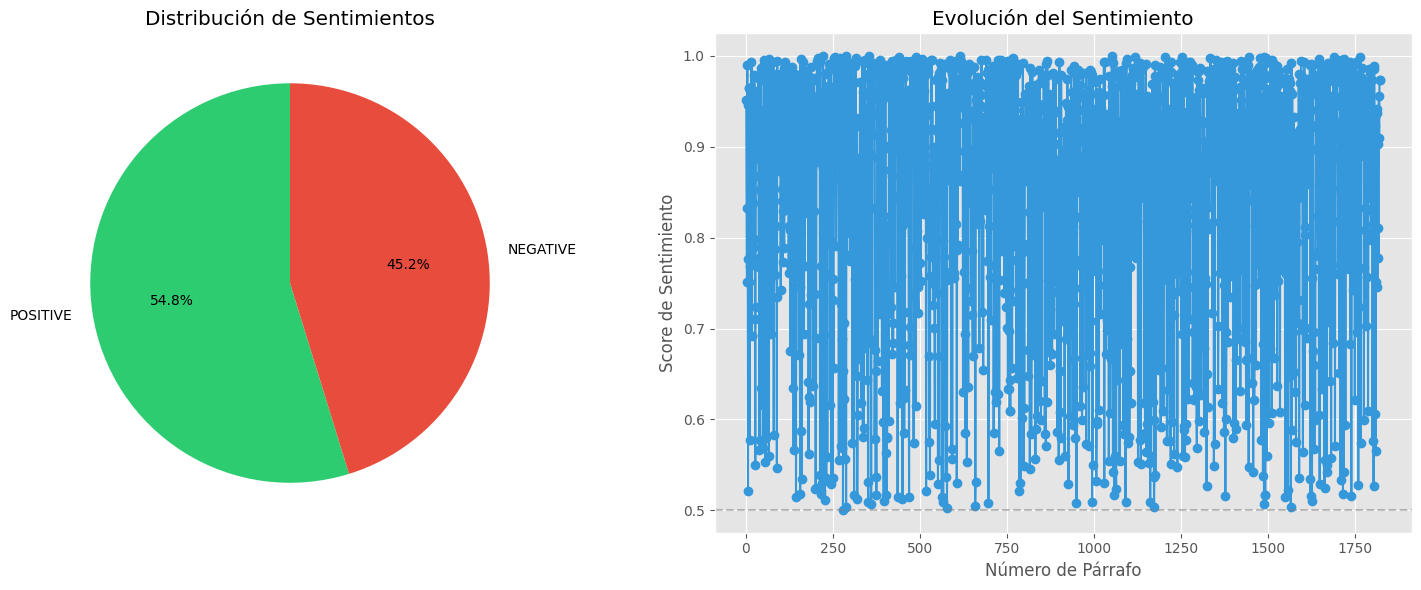

In [20]:
import base64
from io import BytesIO
from datetime import datetime
import os
import html

def generate_sentiment_report(text, output_path='sentiment_analysis_report.html'):
    """
    Genera un reporte HTML completo del análisis de sentimientos
    """
    # Realizar el análisis
    df, stats, paragraphs = analyze_and_interpret_sentiments(text)

    # Obtener interpretación de Claude
    interpretation = get_claude_interpretation(df, stats, paragraphs)

    # Crear visualizaciones y convertirlas a base64
    fig = visualize_sentiments(df)
    buf = BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', dpi=300)
    buf.seek(0)  # Resetear el cursor del buffer
    img_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
    buf.close()

    # Escapar caracteres especiales en la interpretación
    escaped_interpretation = html.escape(interpretation).replace('\n', '<br>')

    # Generar HTML
    html_content = f"""
    <!DOCTYPE html>
    <html lang='es'>
    <head>
        <meta charset='UTF-8'>
        <meta name='viewport' content='width=device-width, initial-scale=1.0'>
        <title>Análisis de Sentimientos - Reporte</title>
        <style>
            /* Estilos del reporte aquí */
        </style>
    </head>
    <body>
        <div class='container'>
            <h1>Análisis de Sentimientos - Reporte Detallado</h1>
            <p><strong>Fecha de generación:</strong> {datetime.now().strftime('%d/%m/%Y %H:%M')}</p>

            <h2>Estadísticas Generales</h2>
            <div class='stats-grid'>
                <div class='stat-card'>
                    <h3>Total de Párrafos</h3>
                    <div class='stat-value'>{stats['total_parrafos']}</div>
                </div>
                <div class='stat-card'>
                    <h3>Párrafos Positivos</h3>
                    <div class='stat-value'>{stats['positivos']} ({stats['positivos']/stats['total_parrafos']*100:.1f}%)</div>
                </div>
                <div class='stat-card'>
                    <h3>Párrafos Negativos</h3>
                    <div class='stat-value'>{stats['negativos']} ({stats['negativos']/stats['total_parrafos']*100:.1f}%)</div>
                </div>
                <div class='stat-card'>
                    <h3>Score Promedio</h3>
                    <div class='stat-value'>{stats['score_promedio']:.3f}</div>
                </div>
            </div>

            <h2>Visualizaciones</h2>
            <div class='visualization'>
                <img src='data:image/png;base64,{img_base64}' alt='Visualizaciones de sentimientos'>
            </div>

            <h2>Interpretación del Análisis</h2>
            <div class='interpretation'>
                {escaped_interpretation}
            </div>

            <h2>Detalles por Párrafo</h2>
            <table>
                <thead>
                    <tr>
                        <th>Párrafo</th>
                        <th>Sentimiento</th>
                        <th>Score</th>
                    </tr>
                </thead>
                <tbody>
                    {''.join(f"<tr><td>{row['párrafo']}</td><td>{row['sentimiento']}</td><td>{row['score']:.3f}</td></tr>" for _, row in df.iterrows())}
                </tbody>
            </table>

            <footer>
                <p>Generado automáticamente usando Python y Claude</p>
            </footer>
        </div>
    </body>
    </html>
    """

    # Guardar el reporte
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(html_content)

    output_file_path = os.path.abspath(output_path)
    print(f"Reporte generado exitosamente en: file://{output_file_path}")

# Generar el reporte
generate_sentiment_report(transcription_text)


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


Error al obtener interpretación de la API: Error code: 404 - {'type': 'error', 'error': {'type': 'not_found_error', 'message': 'model: claude-3'}}
Análisis detallado generado en 'analisis_detallado_sentimientos.html'


'No se pudo obtener la interpretación debido a un error con la API.'

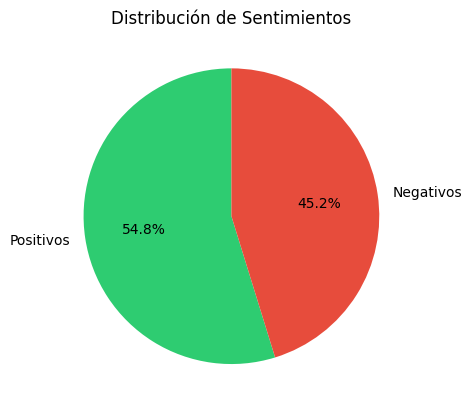

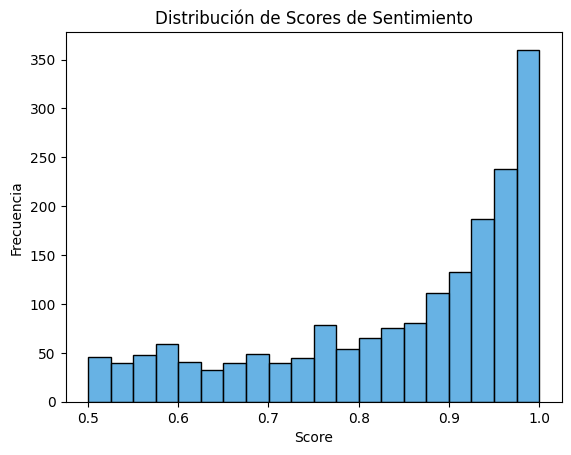

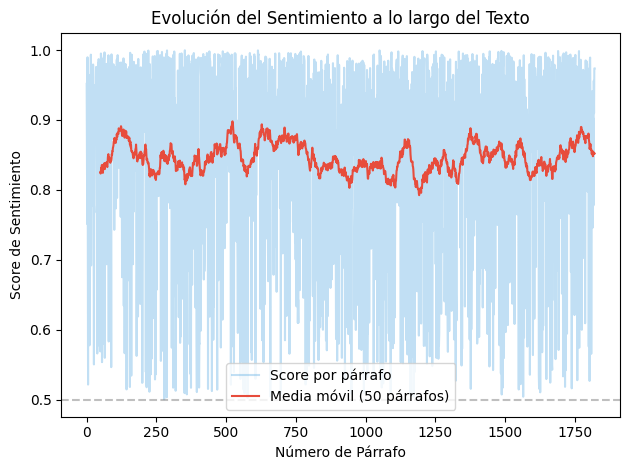

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from anthropic import Anthropic
from io import BytesIO
import base64
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore")

# 1. Análisis de Sentimientos
def analyze_sentiments(transcription_text):
    """
    Realiza el análisis de sentimientos del texto proporcionado.
    """
    sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

    # Dividir el texto en párrafos
    paragraphs = [p for p in transcription_text.split("\n") if p.strip()]
    sentiments = sentiment_analyzer(paragraphs)

    # Crear DataFrame con resultados
    df = pd.DataFrame({
        'párrafo': range(1, len(sentiments) + 1),
        'sentimiento': [s['label'] for s in sentiments],
        'score': [s['score'] for s in sentiments]
    })
    stats = {
        'total_parrafos': len(df),
        'positivos': len(df[df['sentimiento'] == 'POSITIVE']),
        'negativos': len(df[df['sentimiento'] == 'NEGATIVE']),
        'score_promedio': df['score'].mean()
    }
    return df, stats

# 2. Generar Visualizaciones
def create_pie_chart(stats):
    labels = ['Positivos', 'Negativos']
    sizes = [stats['positivos'], stats['negativos']]
    colors = ['#2ecc71', '#e74c3c']
    plt.figure()
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Sentimientos')

def create_histogram(df):
    plt.figure()
    sns.histplot(df['score'], bins=20, color='#3498db')
    plt.title('Distribución de Scores de Sentimiento')
    plt.xlabel('Score')
    plt.ylabel('Frecuencia')

def create_time_series(df):
    plt.figure()
    window_size = 50
    rolling_mean = df['score'].rolling(window=window_size).mean()
    plt.plot(df.index, df['score'], alpha=0.3, color='#3498db', label='Score por párrafo')
    plt.plot(df.index, rolling_mean, color='#e74c3c', label=f'Media móvil ({window_size} párrafos)')
    plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    plt.title('Evolución del Sentimiento a lo largo del Texto')
    plt.xlabel('Número de Párrafo')
    plt.ylabel('Score de Sentimiento')
    plt.legend()

def create_detailed_visualizations(stats, df):
    create_pie_chart(stats)
    create_histogram(df)
    create_time_series(df)
    plt.tight_layout()

# 3. Interpretación con Claude
def get_graph_interpretation(stats, df):
    """
    Obtiene una interpretación detallada de los gráficos usando Claude.
    """
    client = Anthropic(api_key=os.environ.get("ANTHROPIC_API_KEY", ""))
    if not client.api_key:
        raise ValueError("No se encontró la API Key de Anthropic en las variables de entorno.")

    volatility = df['score'].std()
    trends = df['score'].rolling(window=50).mean().diff().mean()

    prompt = f"""Analiza los siguientes resultados y gráficos de un análisis de sentimientos de un texto educativo:

Estadísticas clave:
- Total párrafos: {stats['total_parrafos']}
- Párrafos positivos: {stats['positivos']} ({stats['positivos']/stats['total_parrafos']*100:.1f}%)
- Párrafos negativos: {stats['negativos']} ({stats['negativos']/stats['total_parrafos']*100:.1f}%)
- Score promedio: {stats['score_promedio']:.3f}
- Volatilidad (desviación estándar): {volatility:.3f}
- Tendencia general: {trends:.3f}

Se han generado tres visualizaciones:
1. Un gráfico circular mostrando la distribución de sentimientos positivos vs negativos
2. Un histograma mostrando la distribución de scores de sentimiento
3. Un gráfico de línea mostrando la evolución del sentimiento a lo largo del texto con una media móvil

Por favor, proporciona:
1. Una interpretación detallada de cada gráfico y su significado
2. Patrones y tendencias importantes identificados en las visualizaciones
3. Implicaciones específicas para el contexto educativo
4. Recomendaciones basadas en estos hallazgos

Enfócate en insights prácticos y accionables."""

    try:
        response = client.messages.create(
            model="claude-3",
            max_tokens=1024,
            messages=[
                {"role": "user", "content": prompt}
            ]
        )
        return response.completion
    except Exception as e:
        print(f"Error al obtener interpretación de la API: {e}")
        return "No se pudo obtener la interpretación debido a un error con la API."

# 4. Generar Reporte HTML
def generate_enhanced_analysis(stats, df):
    fig = plt.figure(figsize=(15, 10))
    create_detailed_visualizations(stats, df)

    buffer = BytesIO()
    fig.savefig(buffer, format='png', bbox_inches='tight', dpi=300)
    img_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')
    plt.close(fig)

    interpretation = get_graph_interpretation(stats, df)

    html_content = f"""
<!DOCTYPE html>
<html lang='es'>
<head>
    <meta charset='UTF-8'>
    <title>Análisis Detallado de Sentimientos</title>
    <style>
        body {{
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            max-width: 1200px;
            margin: 0 auto;
            padding: 20px;
            line-height: 1.6;
            color: #333;
        }}
        .visualization {{
            text-align: center;
            margin: 30px 0;
        }}
        .interpretation {{
            background-color: #f8f9fa;
            padding: 20px;
            border-radius: 8px;
            margin: 20px 0;
        }}
        h1, h2 {{
            color: #2c3e50;
            border-bottom: 2px solid #3498db;
            padding-bottom: 10px;
        }}
    </style>
</head>
<body>
    <h1>Análisis Detallado de Sentimientos</h1>

    <div class='visualization'>
        <h2>Visualizaciones</h2>
        <img src='data:image/png;base64,{img_base64}' alt='Visualizaciones de sentimientos'>
    </div>

    <div class='interpretation'>
        <h2>Interpretación Detallada</h2>
        {"<br>".join(interpretation.splitlines())}
    </div>
</body>
</html>
"""


    with open('analisis_detallado_sentimientos.html', 'w', encoding='utf-8') as f:
        f.write(html_content)
    print("Análisis detallado generado en 'analisis_detallado_sentimientos.html'")
    return interpretation

# Ejecutar análisis
df, stats = analyze_sentiments(transcription_text)
generate_enhanced_analysis(stats, df)


In [14]:
def get_detailed_graph_interpretation(stats, volatility, trends):
    """
    Utiliza un modelo LLM para interpretar gráficos y métricas del análisis.
    """
    try:
        # Validar la API Key
        api_key = os.environ.get("ANTHROPIC_API_KEY", "")
        if not api_key:
            raise ValueError("No se encontró la API Key de Anthropics en las variables de entorno.")

        client = Anthropic(api_key=api_key)

        # Crear el contenido del mensaje
        content = f"""
        Analiza los resultados del análisis de sentimientos de un texto educativo basados en las siguientes métricas y gráficos:

        Estadísticas generales:
        - Total de párrafos: {stats['total_parrafos']}
        - Párrafos positivos: {stats['positivos']} ({stats['positivos']/stats['total_parrafos']*100:.1f}%)
        - Párrafos negativos: {stats['negativos']} ({stats['negativos']/stats['total_parrafos']*100:.1f}%)
        - Volatilidad de los scores (desviación estándar): {volatility:.3f}
        - Tendencia general (cambio promedio en la media móvil): {trends:.3f}

        Descripción de gráficos:
        1. Un gráfico circular muestra que la mayoría de los párrafos tienen un sentimiento positivo.
        2. Un histograma indica una concentración de scores en el rango alto (cercano a 1), con una menor frecuencia en scores bajos.
        3. Un gráfico de línea muestra la evolución del sentimiento a lo largo del texto, destacando picos y valles significativos con una media móvil.

        Por favor, proporciona:
        1. Una interpretación detallada de cada gráfico y su significado.
        2. Identificación de patrones y tendencias importantes en los datos.
        3. Recomendaciones específicas para aplicar estos hallazgos en un contexto educativo.
        """

        # Usar la Messages API
        response = client.messages.create(
            model="claude-3-sonnet-20240229",
            max_tokens=1024,
            messages=[
                {
                    "role": "user",
                    "content": content
                }
            ]
        )

        # Verificar y retornar la respuesta
        if response.content:
            return response.content[0].text
        else:
            raise ValueError(f"La respuesta de la API está vacía: {response}")

    except ValueError as ve:
        print(f"Error de valor: {ve}")
        return "Error de configuración: revisa la API Key o los parámetros."
    except KeyError as ke:
        print(f"Error de clave en la respuesta: {ke}")
        return "Error de clave en la respuesta de la API."
    except Exception as e:
        print(f"Error al obtener interpretación de la API: {e}")
        return "No se pudo obtener la interpretación debido a un error inesperado."

In [15]:
# Calcular métricas adicionales
volatility = df['score'].std()
trends = df['score'].rolling(window=50).mean().diff().mean()

# Obtener interpretación
interpretation = get_detailed_graph_interpretation(stats, volatility, trends)
print(interpretation)

1. Interpretación detallada de los gráficos:

Gráfico circular: Este gráfico muestra la distribución general de párrafos positivos y negativos en el texto. La mayor área está ocupada por el color que representa los párrafos positivos (54.8%), lo que indica que la mayoría del contenido tiene un tono positivo o alentador.

Histograma: Este gráfico representa la frecuencia de los diferentes valores de puntaje de sentimiento. Se observa una alta concentración de puntajes cercanos a 1, lo que sugiere que la mayoría de los párrafos tienen un sentimiento muy positivo. A medida que los puntajes disminuyen, la frecuencia también disminuye, lo que indica que hay menos párrafos con sentimientos negativos.

Gráfico de línea: Este gráfico traza la evolución del sentimiento a lo largo del texto, mostrando los picos y valles significativos. La línea continua representa los puntajes de sentimiento reales de cada párrafo, mientras que la línea más suavizada (media móvil) destaca las tendencias generale

### Gráficos para Análisis de Temas

In [19]:
!pip install gensim pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.9 MB/s eta 0:00:00


In [23]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Preprocesar el texto
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download('punkt_tab')


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words("english"))
    return [word for word in tokens if word.isalnum() and word not in stop_words]

# Tokenizar la transcripción
tokens = preprocess_text(transcription_text)

# Crear un diccionario y un corpus
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

# Crear modelo LDA
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

# Visualizar temas
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [24]:
# Guardar la visualización en un archivo HTML
pyLDAvis.save_html(lda_vis, "lda_visualization.html")
print("Visualización guardada en 'lda_visualization.html'.")


Visualización guardada en 'lda_visualization.html'.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Exportar temas como texto
topics = lda_model.show_topics(num_topics=-1, num_words=10, formatted=False)
with open("lda_topics.txt", "w") as f:
    for i, words in topics:
        f.write(f"Tema {i + 1}: " + ", ".join([word for word, _ in words]) + "\n")
print("Temas exportados a 'lda_topics.txt'.")


Temas exportados a 'lda_topics.txt'.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from anthropic import Anthropic
import os

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words("english"))
    return [word for word in tokens if word.isalnum() and word not in stop_words]

def get_topics_interpretation(lda_model, dictionary, corpus, transcription_text):
    """
    Obtiene una interpretación detallada de los temas usando la API de Claude
    """
    try:
        client = Anthropic(api_key=os.environ.get("ANTHROPIC_API_KEY"))

        # Obtener los principales términos para cada tema
        topics_terms = []
        for idx, topic in lda_model.show_topics(formatted=False):
            terms = [(term, round(weight, 4)) for term, weight in topic]
            topics_terms.append(terms)

        # Obtener la distribución de temas para el documento
        doc_topics = lda_model.get_document_topics(corpus[0])

        # Preparar los temas y sus términos
        topics_text = ""
        for i, terms in enumerate(topics_terms):
            topic_terms = ", ".join([f"{term}({weight})" for term, weight in terms[:5]])
            topics_text += f"Tema {i+1}: {topic_terms}\n"

        # Preparar la distribución de temas
        distribution_text = ", ".join([f"Tema {i+1}: {round(weight*100, 2)}%" for i, weight in doc_topics])

        # Crear el contenido para el análisis
        content = "Analiza los resultados del modelo LDA (Latent Dirichlet Allocation) aplicado a un texto.\n\n"
        content += f"Resumen del texto original:\n{transcription_text[:500]}...\n\n"
        content += f"Temas identificados y sus términos principales:\n{topics_text}\n"
        content += f"Distribución de temas en el documento:\n{distribution_text}\n\n"
        content += """Por favor, proporciona:
1. Una interpretación detallada de cada tema identificado y su significado en el contexto del texto.
2. Un análisis de la distribución de temas y qué nos dice sobre el contenido principal del documento.
3. Identificación de posibles subtemas o conexiones entre los temas principales.
4. Sugerencias sobre cómo estos temas podrían ser útiles para entender mejor el documento."""

        # Realizar la solicitud a la API
        response = client.messages.create(
            model="claude-3-sonnet-20240229",
            max_tokens=2048,
            messages=[
                {
                    "role": "user",
                    "content": content
                }
            ]
        )

        return response.content[0].text

    except Exception as e:
        print(f"Error al obtener la interpretación: {e}")
        return "No se pudo obtener la interpretación de los temas."

# Descargar recursos necesarios
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('punkt_tab')


# Tokenizar la transcripción
tokens = preprocess_text(transcription_text)

# Crear un diccionario y un corpus
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

# Crear modelo LDA
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

# Visualizar temas
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

# Obtener interpretación detallada
interpretation = get_topics_interpretation(lda_model, dictionary, corpus, transcription_text)
print("\nInterpretación detallada de los temas:")
print(interpretation)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Interpretación detallada de los temas:
1. Interpretación detallada de cada tema identificado y su significado en el contexto del texto:

Tema 1: Este tema parece capturar las palabras más comunes en el texto, como "de", "que", "la", "en" y "el". Estas son palabras funcionales y no aportan mucho significado semántico específico. Sin embargo, su alta frecuencia sugiere que este tema representa el lenguaje general utilizado en el texto.

Tema 2: Este tema también incluye palabras funcionales como "en", "que", "la", "de" y "los". Sin embargo, sus pesos son muy bajos, lo que indica que no es un tema particularmente prominente en el texto.

Tema 3: Al igual que los temas anteriores, este tema contiene principalmente palabras funcionales con pesos bajos.

Tema 4: Este tema es similar a los temas 2 y 3, con palabras funcionales y pesos bajos.

Tema 5: Al igual que los demás temas, este tema se compone de palabras funcionales, pero con pesos ligeramente más altos que los temas 2, 3 y 4.

2. An

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


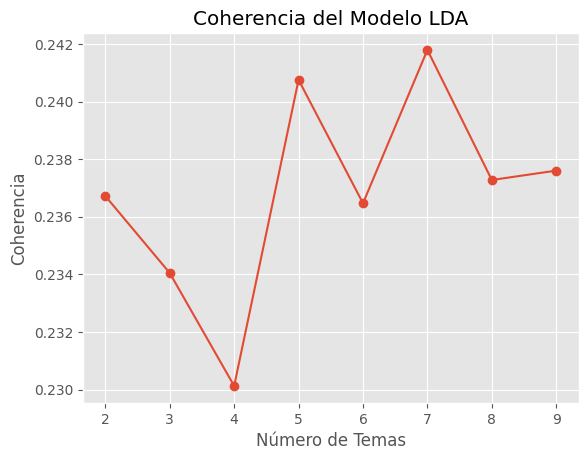

Modelo seleccionado: 7 temas (Coherencia: 0.2418)

Temas principales:
Tema 1: estudiantes, entonces, colegio, educación, si, importante, docentes, finlandia, ejemplo, parte
Tema 2: estudiantes, entonces, educación, finlandia, si, innovación, docentes, colegio, ejemplo, vamos
Tema 3: estudiantes, entonces, colegio, educación, si, finlandia, siempre, aprendizaje, importante, ejemplo
Tema 4: estudiantes, entonces, colegio, si, educación, vamos, parte, ejemplo, diferentes, importante
Tema 5: estudiantes, colegio, entonces, si, ejemplo, educación, finlandia, parte, vamos, importante
Tema 6: estudiantes, educación, entonces, docentes, colegio, si, importante, ejemplo, siempre, vamos
Tema 7: estudiantes, ejemplo, colegio, entonces, finlandia, parte, docentes, educación, si, hacer
Visualización interactiva guardada en 'lda_visualization_detailed.html'
Tema 1: 1 documentos


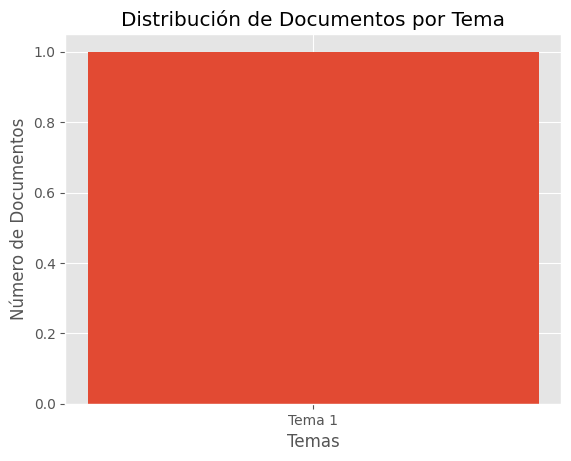

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download("punkt")
nltk.download("stopwords")

# 1. Preprocesamiento del Texto
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words("spanish"))  # Cambia a 'english' si el texto está en inglés
    return [word for word in tokens if word.isalnum() and word not in stop_words]

# Cargar la transcripción del texto
with open("transcription.txt", "r", encoding="utf-8") as f:
    transcription_text = f.read()

tokens = preprocess_text(transcription_text)

# Crear un diccionario y un corpus
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

# 2. Ajustar parámetros y crear modelos con diferentes num_topics
def train_lda_models(corpus, dictionary, topic_range):
    models = {}
    for num_topics in topic_range:
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15, iterations=50)
        models[num_topics] = model
    return models

topic_range = range(2, 10)  # Probar con 2 a 9 temas
lda_models = train_lda_models(corpus, dictionary, topic_range)

# 3. Evaluar la coherencia de los modelos
def evaluate_coherence(models, dictionary, texts):
    coherence_scores = {}
    for num_topics, model in models.items():
        coherence_model = CoherenceModel(model=model, texts=[tokens], dictionary=dictionary, coherence='c_v')
        coherence_scores[num_topics] = coherence_model.get_coherence()
    return coherence_scores

coherence_scores = evaluate_coherence(lda_models, dictionary, [tokens])

# 4. Graficar coherencia para determinar el número óptimo de temas
plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), marker='o')
plt.xlabel('Número de Temas')
plt.ylabel('Coherencia')
plt.title('Coherencia del Modelo LDA')
plt.show()

# Seleccionar el modelo con mayor coherencia
best_num_topics = max(coherence_scores, key=coherence_scores.get)
lda_model = lda_models[best_num_topics]
print(f"Modelo seleccionado: {best_num_topics} temas (Coherencia: {coherence_scores[best_num_topics]:.4f})")

# 5. Visualizar los temas principales
print("\nTemas principales:")
for topic_id, topic_words in lda_model.show_topics(num_topics=-1, num_words=10, formatted=False):
    print(f"Tema {topic_id + 1}: {', '.join([word for word, _ in topic_words])}")

# 6. Guardar visualización interactiva
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(lda_vis, "lda_visualization_detailed.html")
print("Visualización interactiva guardada en 'lda_visualization_detailed.html'")

# 7. Distribución de documentos por tema
topic_docs = defaultdict(list)
for idx, topic_distribution in enumerate(lda_model[corpus]):
    dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    topic_docs[dominant_topic].append(idx)

for topic, docs in topic_docs.items():
    print(f"Tema {topic + 1}: {len(docs)} documentos")

# 8. Graficar distribución de documentos por tema
topic_counts = [len(docs) for docs in topic_docs.values()]
plt.bar(range(len(topic_counts)), topic_counts, tick_label=[f"Tema {i + 1}" for i in range(len(topic_counts))])
plt.title("Distribución de Documentos por Tema")
plt.xlabel("Temas")
plt.ylabel("Número de Documentos")
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


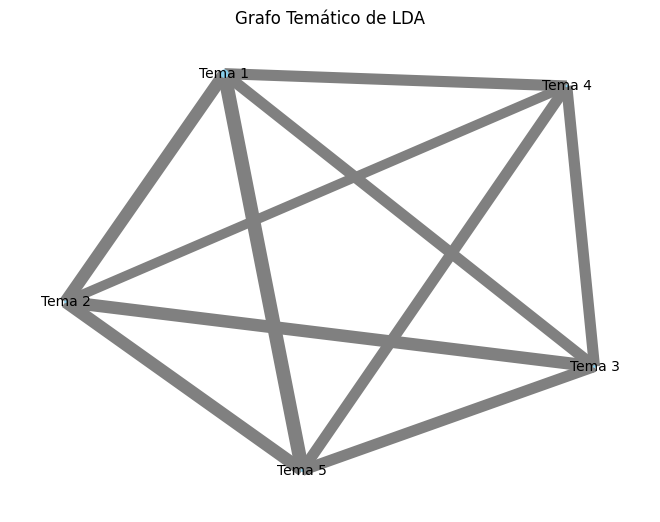

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

def create_lda_graph(lda_model, dictionary):
    # Crear un grafo vacío
    G = nx.Graph()

    # Agregar nodos para cada tema
    for topic_id in range(lda_model.num_topics):
        # Obtener las palabras clave del tema con sus pesos
        topic_words = lda_model.show_topic(topic_id, topn=10)
        # Calcular el tamaño del nodo como el número total de palabras clave (o su peso combinado)
        topic_size = sum(weight for _, weight in topic_words)
        G.add_node(f"Tema {topic_id+1}", size=topic_size)

    # Agregar conexiones basadas en palabras clave comunes entre temas
    for topic1 in range(lda_model.num_topics):
        for topic2 in range(topic1 + 1, lda_model.num_topics):
            words_topic1 = set([word for word, _ in lda_model.show_topic(topic1)])
            words_topic2 = set([word for word, _ in lda_model.show_topic(topic2)])  # Corrección aquí
            common_words = words_topic1.intersection(words_topic2)
            if common_words:
                # Ponderar la arista por el número de palabras comunes
                G.add_edge(f"Tema {topic1+1}", f"Tema {topic2+1}", weight=len(common_words))

    return G

def visualize_graph(G):
    # Calcular posiciones para los nodos
    pos = nx.spring_layout(G)
    # Extraer tamaños de los nodos
    sizes = [G.nodes[node]['size'] * 100 for node in G.nodes]
    # Extraer pesos de las aristas
    weights = [G.edges[edge]['weight'] for edge in G.edges]

    # Dibujar el grafo
    nx.draw(
        G, pos, with_labels=True, node_size=sizes, width=weights,
        node_color='skyblue', edge_color='gray', font_size=10
    )
    plt.title("Grafo Temático de LDA")
    plt.show()

# Crear el grafo con el modelo LDA y el diccionario
lda_graph = create_lda_graph(lda_model, dictionary)
visualize_graph(lda_graph)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


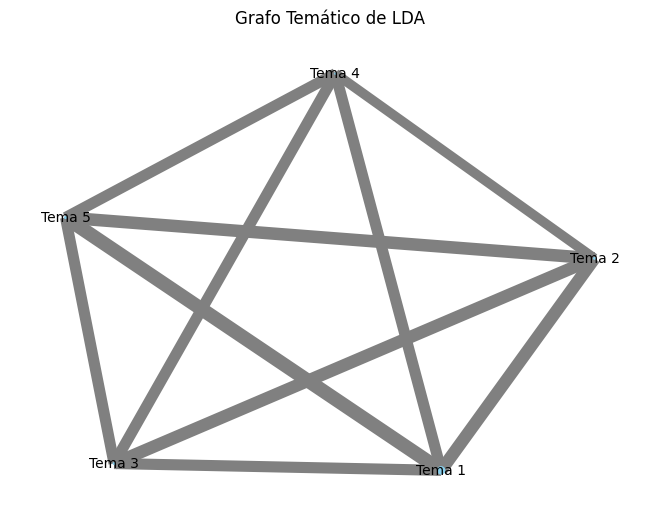

In [24]:
def simplify_graph(G, weight_threshold=2):
    """
    Simplifica el grafo eliminando las aristas con peso menor al umbral.
    """
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < weight_threshold]
    G.remove_edges_from(edges_to_remove)
    return G

# Simplificar el grafo eliminando aristas débiles
simplified_graph = simplify_graph(lda_graph, weight_threshold=2)
visualize_graph(simplified_graph)

In [25]:
def label_graph_with_keywords(G, lda_model, topn=3):
    """
    Agrega palabras clave principales como etiquetas a los nodos del grafo.
    """
    for topic_id in range(lda_model.num_topics):
        top_words = ", ".join([word for word, _ in lda_model.show_topic(topic_id, topn=topn)])
        G.nodes[f"Tema {topic_id+1}"]['label'] = top_words
    return G

# Etiquetar el grafo con palabras clave
labeled_graph = label_graph_with_keywords(simplified_graph, lda_model)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
!pip install --upgrade ipython ipykernel


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.6/821.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 r

In [26]:
def label_graph_with_keywords(G, lda_model, topn=3):
    """
    Agrega palabras clave principales como etiquetas a los nodos del grafo.
    """
    for node in G.nodes:
        # Extraer el número del tema desde el nombre del nodo
        try:
            topic_id = int(node.split()[-1]) - 1  # Convertir 'Tema X' en índice
            # Obtener las palabras clave principales del tema
            top_words = ", ".join([word for word, _ in lda_model.show_topic(topic_id, topn=topn)])
            # Agregar las palabras clave como etiqueta
            G.nodes[node]['label'] = top_words
        except Exception as e:
            print(f"Error al etiquetar el nodo {node}: {e}")
            G.nodes[node]['label'] = "No disponible"
    return G

# Aplicar la función al grafo simplificado
labeled_graph = label_graph_with_keywords(simplified_graph, lda_model)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
def visualize_graph(G):
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')  # Extraer etiquetas
    sizes = [G.nodes[node]['size'] * 100 for node in G.nodes]
    weights = [G.edges[edge]['weight'] for edge in G.edges]

    nx.draw(
        G, pos, with_labels=True, labels=labels, node_size=sizes,
        width=weights, node_color='skyblue', edge_color='gray', font_size=10
    )
    plt.title("Grafo Temático de LDA (Etiquetado)")
    plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
def visualize_graph_with_colors(G):
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    sizes = [G.nodes[node]['size'] * 100 for node in G.nodes]
    weights = [G.edges[edge]['weight'] for edge in G.edges]
    colors = [G.nodes[node]['size'] for node in G.nodes]  # Usar tamaño como intensidad de color

    nx.draw(
        G, pos, with_labels=True, labels=labels, node_size=sizes,
        width=weights, node_color=colors, cmap=plt.cm.Blues, edge_color='gray', font_size=10
    )
    plt.title("Grafo Temático de LDA (Colores por Peso)")
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label="Peso del Tema")
    plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# Grado de cada nodo (número de conexiones)
degree = dict(nx.degree(simplified_graph))
print("Grado de cada tema:", degree)

# Densidad del grafo
density = nx.density(simplified_graph)
print("Densidad del grafo:", density)

# Componentes conectados
components = list(nx.connected_components(simplified_graph))
print("Componentes conectados:", components)


Grado de cada tema: {'Tema 1': 4, 'Tema 2': 4, 'Tema 3': 4, 'Tema 4': 4, 'Tema 5': 4}
Densidad del grafo: 1.0
Componentes conectados: [{'Tema 1', 'Tema 2', 'Tema 4', 'Tema 5', 'Tema 3'}]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualización del Impacto

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


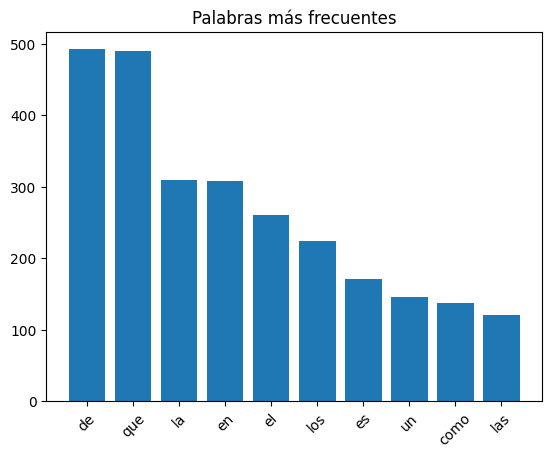

In [30]:
import matplotlib.pyplot as plt
from collections import Counter

# Contar las palabras más frecuentes
word_counts = Counter(tokens)
most_common_words = word_counts.most_common(10)

# Gráfico de barras
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.title("Palabras más frecuentes")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


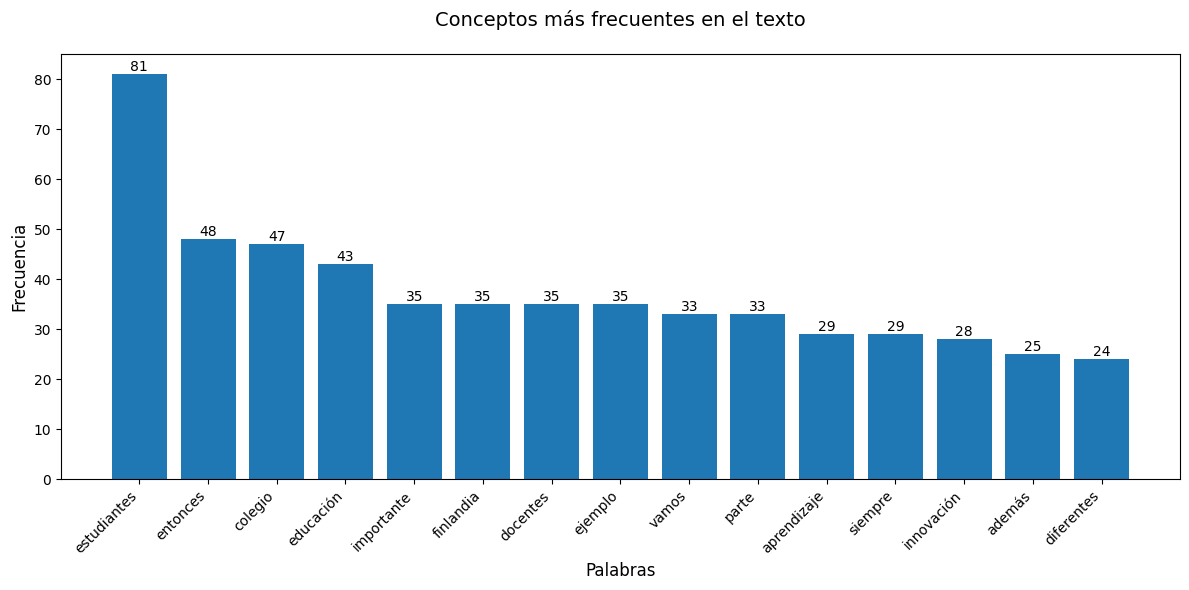


Conceptos más frecuentes encontrados:
estudiantes: 81 veces
entonces: 48 veces
colegio: 47 veces
educación: 43 veces
importante: 35 veces
finlandia: 35 veces
docentes: 35 veces
ejemplo: 35 veces
vamos: 33 veces
parte: 33 veces
aprendizaje: 29 veces
siempre: 29 veces
innovación: 28 veces
además: 25 veces
diferentes: 24 veces


In [31]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Para lematización en múltiples idiomas

def preprocess_text_improved(text):
    # Convertir a minúsculas
    text = text.lower()

    # Combinar stopwords en español e inglés
    stop_words_es = set(stopwords.words('spanish'))
    stop_words_en = set(stopwords.words('english'))
    all_stop_words = stop_words_es.union(stop_words_en)

    # Palabras adicionales a excluir (personalizar según necesidades)
    custom_stops = {
        'si', 'ok', 'ser', 'etc', 'hacia', 'asi', 'aqui', 'ahi',
        'manera', 'forma', 'lado', 'vez', 'cada', 'poder', 'hacer',
        'tener', 'estar', 'haber', 'decir', 'dar', 'ver'
    }
    all_stop_words.update(custom_stops)

    # Tokenización
    tokens = word_tokenize(text)

    # Inicializar lematizador
    lemmatizer = WordNetLemmatizer()

    # Limpiar y filtrar tokens
    cleaned_tokens = []
    for token in tokens:
        # Solo mantener palabras con letras
        if re.match(r'^[a-záéíóúñ]+$', token):
            # Solo palabras con longitud > 3
            if len(token) > 3:
                # No incluir stopwords
                if token not in all_stop_words:
                    # Lematizar
                    lemma = lemmatizer.lemmatize(token)
                    cleaned_tokens.append(lemma)

    return cleaned_tokens

# Procesar el texto
tokens = preprocess_text_improved(transcription_text)

# Contar las palabras más frecuentes
word_counts = Counter(tokens)
most_common_words = word_counts.most_common(15)  # Aumentamos a 15 palabras

# Crear el gráfico
plt.figure(figsize=(12, 6))
words, counts = zip(*most_common_words)

# Crear barras con colores
bars = plt.bar(words, counts)
plt.title("Conceptos más frecuentes en el texto", fontsize=14, pad=20)
plt.xlabel("Palabras", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# Rotar etiquetas y ajustar layout
plt.xticks(rotation=45, ha='right')

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Imprimir los conceptos más frecuentes y su conteo
print("\nConceptos más frecuentes encontrados:")
for word, count in most_common_words:
    print(f"{word}: {count} veces")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


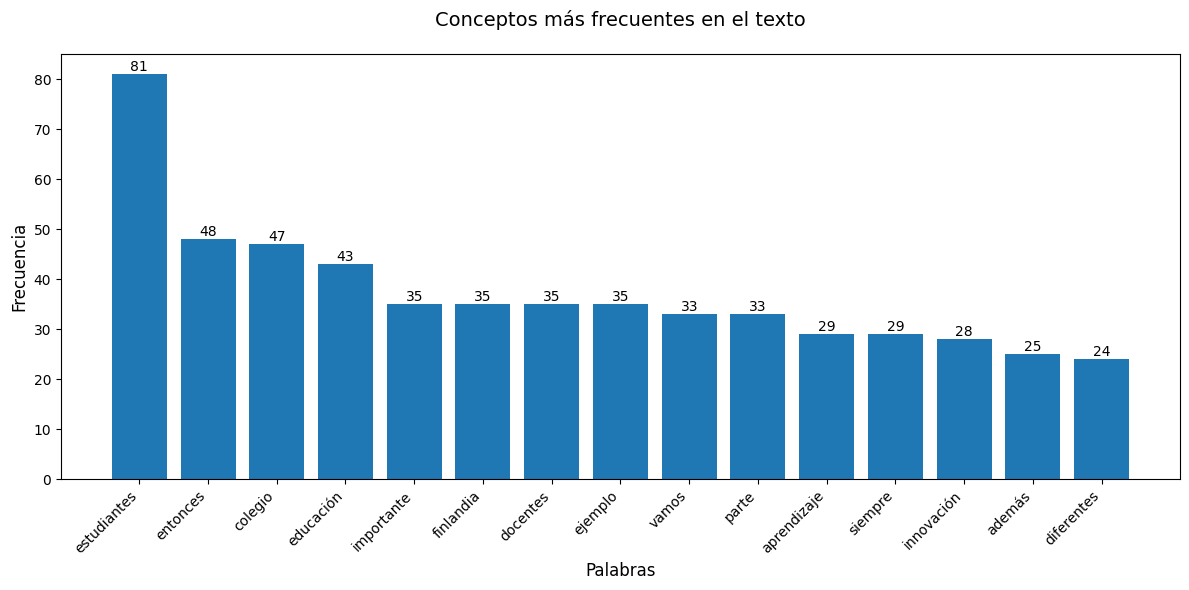


Conceptos más frecuentes encontrados:
estudiantes: 81 veces
entonces: 48 veces
colegio: 47 veces
educación: 43 veces
importante: 35 veces
finlandia: 35 veces
docentes: 35 veces
ejemplo: 35 veces
vamos: 33 veces
parte: 33 veces
aprendizaje: 29 veces
siempre: 29 veces
innovación: 28 veces
además: 25 veces
diferentes: 24 veces


In [32]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Para lematización en múltiples idiomas

def preprocess_text_improved(text):
    # Convertir a minúsculas
    text = text.lower()

    # Combinar stopwords en español e inglés
    stop_words_es = set(stopwords.words('spanish'))
    stop_words_en = set(stopwords.words('english'))
    all_stop_words = stop_words_es.union(stop_words_en)

    # Palabras adicionales a excluir (personalizar según necesidades)
    custom_stops = {
        'si', 'ok', 'ser', 'etc', 'hacia', 'asi', 'aqui', 'ahi',
        'manera', 'forma', 'lado', 'vez', 'cada', 'poder', 'hacer',
        'tener', 'estar', 'haber', 'decir', 'dar', 'ver'
    }
    all_stop_words.update(custom_stops)

    # Tokenización
    tokens = word_tokenize(text)

    # Inicializar lematizador
    lemmatizer = WordNetLemmatizer()

    # Limpiar y filtrar tokens
    cleaned_tokens = []
    for token in tokens:
        # Solo mantener palabras con letras
        if re.match(r'^[a-záéíóúñ]+$', token):
            # Solo palabras con longitud > 3
            if len(token) > 3:
                # No incluir stopwords
                if token not in all_stop_words:
                    # Lematizar
                    lemma = lemmatizer.lemmatize(token)
                    cleaned_tokens.append(lemma)

    return cleaned_tokens

# Procesar el texto
tokens = preprocess_text_improved(transcription_text)

# Contar las palabras más frecuentes
word_counts = Counter(tokens)
most_common_words = word_counts.most_common(15)  # Aumentamos a 15 palabras

# Crear el gráfico
plt.figure(figsize=(12, 6))
words, counts = zip(*most_common_words)

# Crear barras con colores
bars = plt.bar(words, counts)
plt.title("Conceptos más frecuentes en el texto", fontsize=14, pad=20)
plt.xlabel("Palabras", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# Rotar etiquetas y ajustar layout
plt.xticks(rotation=45, ha='right')

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Imprimir los conceptos más frecuentes y su conteo
print("\nConceptos más frecuentes encontrados:")
for word, count in most_common_words:
    print(f"{word}: {count} veces")

### Resumen Visual

Diagrama de Sankey

Un diagrama de Sankey es excelente para mostrar relaciones entre temas principales y secundarios o el flujo lógico de una narrativa.

In [33]:
!pip install plotly


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
import plotly.graph_objects as go

def create_sankey_chart(data):
    """
    Crea un diagrama de Sankey para representar visualmente el resumen del discurso.
    """
    # Definir los nodos (temas principales y secundarios)
    nodes = list(set([item for sublist in data for item in sublist]))
    node_indices = {node: i for i, node in enumerate(nodes)}

    # Definir las conexiones entre los nodos
    sources = [node_indices[source] for source, target, value in data]
    targets = [node_indices[target] for source, target, value in data]
    values = [value for source, target, value in data]

    # Crear el diagrama de Sankey
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=nodes
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values
        )
    ))

    fig.update_layout(title_text="Resumen Visual del Discurso", font_size=10)
    fig.show()

# Datos de ejemplo (modifica según el análisis del discurso)
sankey_data = [
    ("Innovación", "Uso de tecnología", 5),
    ("Innovación", "Ejemplos prácticos", 3),
    ("Uso de tecnología", "Herramientas digitales", 2),
    ("Uso de tecnología", "Aplicaciones móviles", 3),
    ("Ejemplos prácticos", "Casos reales", 4),
    ("Casos reales", "Impacto en el aula", 6),
]

# Crear el diagrama
create_sankey_chart(sankey_data)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mapa Mental

Si prefieres un mapa mental, podemos usar networkx y matplotlib para generar un gráfico de nodos.

In [35]:
!pip install networkx matplotlib


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



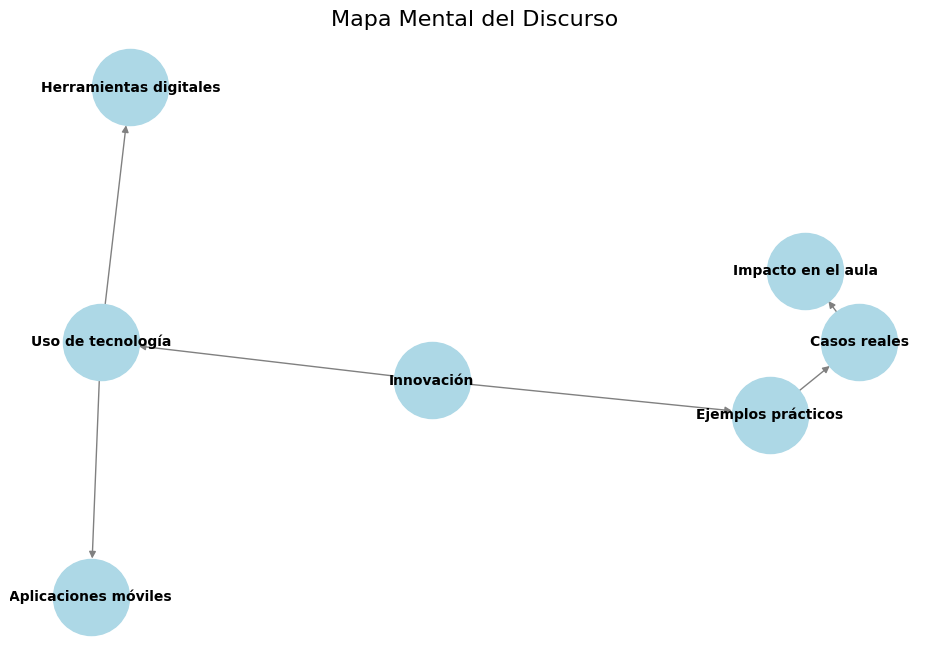

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

def create_mind_map(data):
    """
    Crea un mapa mental para representar visualmente el discurso.
    """
    G = nx.DiGraph()

    # Agregar nodos y relaciones
    for source, target, _ in data:
        G.add_edge(source, target)

    # Crear el diseño del gráfico
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    plt.figure(figsize=(12, 8))
    nx.draw_networkx(
        G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
        font_size=10, font_weight="bold", node_size=3000
    )
    plt.title("Mapa Mental del Discurso", fontsize=16)
    plt.axis("off")
    plt.show()

# Usar los mismos datos de ejemplo
create_mind_map(sankey_data)


### Grafo con networkx y matplotlib


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



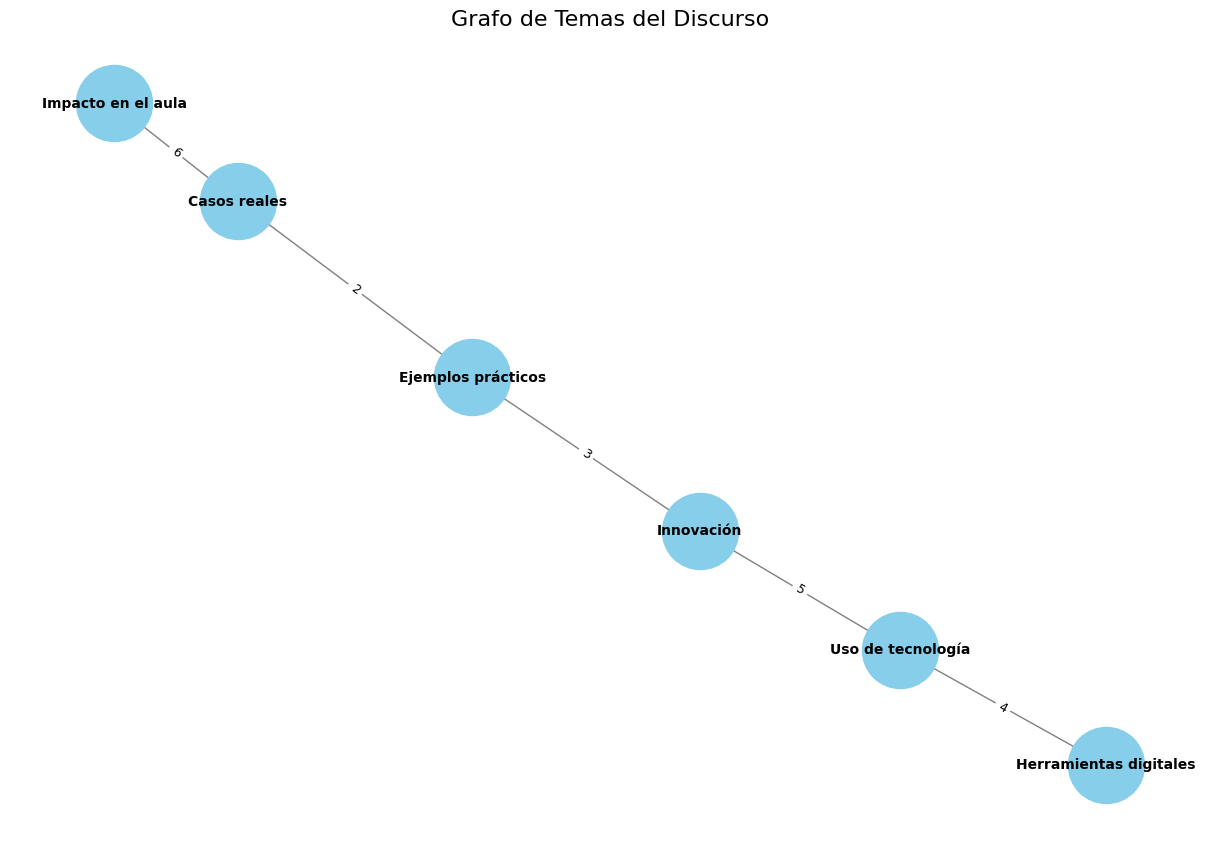

In [37]:
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

def create_graph(data):
    """
    Crea un grafo simple para representar las conexiones entre temas.
    """
    G = nx.Graph()

    # Agregar nodos y relaciones desde los datos
    for source, target, weight in data:
        G.add_edge(source, target, weight=weight)

    # Crear un diseño para el grafo
    pos = nx.spring_layout(G, k=0.5)

    # Dibujar el grafo
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=True, node_color="skyblue", edge_color="gray",
        font_size=10, font_weight="bold", node_size=3000
    )

    # Agregar etiquetas para los pesos de las conexiones
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    plt.title("Grafo de Temas del Discurso", fontsize=16)
    plt.axis("off")
    plt.show()

# Datos de ejemplo (tema principal, tema relacionado, peso de conexión)
graph_data = [
    ("Innovación", "Uso de tecnología", 5),
    ("Innovación", "Ejemplos prácticos", 3),
    ("Uso de tecnología", "Herramientas digitales", 4),
    ("Ejemplos prácticos", "Casos reales", 2),
    ("Casos reales", "Impacto en el aula", 6)
]

# Crear el grafo
create_graph(graph_data)


### Grafo Interactivo con pyvis


In [38]:
!pip install pyvis


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.6 MB/s eta 0:00:00


In [39]:
from pyvis.network import Network

def create_interactive_graph(data):
    """
    Crea un grafo interactivo usando pyvis.
    """
    net = Network(notebook=True, height="750px", width="100%", bgcolor="#ffffff", font_color="black")

    # Agregar nodos y relaciones desde los datos
    for source, target, weight in data:
        net.add_node(source, title=source)
        net.add_node(target, title=target)
        net.add_edge(source, target, value=weight)

    # Configurar opciones del grafo
    net.set_options('''
    var options = {
      "nodes": {
        "color": {
          "border": "rgba(0,0,0,1)",
          "background": "rgba(135,206,250,1)"
        }
      },
      "edges": {
        "color": {
          "inherit": true
        },
        "smooth": {
          "type": "dynamic"
        }
      }
    }
    ''')

    # Mostrar el grafo
    net.show("graph.html")

# Crear el grafo interactivo
create_interactive_graph(graph_data)


graph.html


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Datos Dinámicos:

Usa un modelo LLM para extraer automáticamente temas principales, relaciones, y pesos del discurso

In [43]:
from anthropic import Client
import os

# Cliente de Anthropic
client = Client(api_key=os.environ["ANTHROPIC_API_KEY"])

def extract_topics_and_relations(text):
    """
    Extrae temas principales, relaciones y pesos del discurso usando un LLM.
    """
    prompt = f"""
    You are an expert in discourse analysis. Based on the following transcript, extract the main topics, their subtopics,
    and the relationships between them. Include a relevance score (1-10) for each relationship.

    Transcript:
    {text}

    Provide the output in the following format:
    [
        ("Main Topic", "Related Topic", Relevance Score),
        ...
    ]
    """
    response = client.messages.create(
        model="claude-3-sonnet-20240229",
        max_tokens=4096,
        system=prompt,
        messages=[
            {"role": "user", "content": prompt}
        ]
    )

    # Extraer el contenido de la respuesta
    topic_analysis = eval(response.content[0].text)
    return topic_analysis


# Usar la función en la transcripción
with open("transcription.txt", "r") as f:
    transcription_text = f.read()

relations_data = extract_topics_and_relations(transcription_text)
print("Relaciones extraídas:\n", relations_data)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Relaciones extraídas:
 [('Innovación educativa', 'Principios de la educación finlandesa', 9), ('Innovación educativa', 'Experiencia del Colegio Alberto Mezquana', 9), ('Educación finlandesa', 'Resultados en pruebas internacionales', 7), ('Educación finlandesa', 'Bienestar de los estudiantes', 9), ('Educación finlandesa', 'Confianza en los docentes', 8), ('Educación finlandesa', 'Currículum nacional', 8), ('Colegio Alberto Mezquana', 'Adopción de tecnologías', 8), ('Colegio Alberto Mezquana', 'Educación emocional', 9), ('Colegio Alberto Mezquana', 'Metodologías activas de aprendizaje', 9), ('Colegio Alberto Mezquana', 'Orientación vocacional', 7), ('Innovación educativa', 'Uso de espacios educativos', 7), ('Innovación educativa', 'Colaboración con otras instituciones', 8)]


In [54]:
print(relations_data)


[('Innovación educativa', 'Principios de la educación finlandesa', 9), ('Innovación educativa', 'Experiencia del Colegio Alberto Mezquana', 9), ('Educación finlandesa', 'Resultados en pruebas internacionales', 7), ('Educación finlandesa', 'Bienestar de los estudiantes', 9), ('Educación finlandesa', 'Confianza en los docentes', 8), ('Educación finlandesa', 'Currículum nacional', 8), ('Colegio Alberto Mezquana', 'Adopción de tecnologías', 8), ('Colegio Alberto Mezquana', 'Educación emocional', 9), ('Colegio Alberto Mezquana', 'Metodologías activas de aprendizaje', 9), ('Colegio Alberto Mezquana', 'Orientación vocacional', 7), ('Innovación educativa', 'Uso de espacios educativos', 7), ('Innovación educativa', 'Colaboración con otras instituciones', 8)]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Crear un Grafo Dinámico con los Datos Extraídos
Ahora que tenemos los datos generados, podemos usarlos para construir un grafo dinámico.

Grafo Dinámico con pyvis:

In [49]:
from pyvis.network import Network

def create_dynamic_graph(data):
    """
    Crea un grafo interactivo usando datos generados por un modelo LLM.
    """
    net = Network(notebook=True, height="750px", width="100%", bgcolor="#ffffff", font_color="black")

    # Agregar nodos y relaciones
    for source, target, weight in data:
        net.add_node(source, title=source)
        net.add_node(target, title=target)
        net.add_edge(source, target, value=weight)

    # Configurar opciones del grafo
    net.set_options('''
    var options = {
      "nodes": {
        "color": {
          "border": "rgba(0,0,0,1)",
          "background": "rgba(135,206,250,1)"
        }
      },
      "edges": {
        "color": {
          "inherit": true
        },
        "smooth": {
          "type": "dynamic"
        }
      }
    }
    ''')

    # Mostrar el grafo
    net.show("dynamic_graph.html")

# Crear el grafo dinámico con los datos extraídos
create_dynamic_graph(relations_data)


dynamic_graph.html


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Nube de Palabras: Resalta Términos Frecuentes
Crea una nube de palabras para identificar rápidamente las palabras clave más utilizadas en el discurso.



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



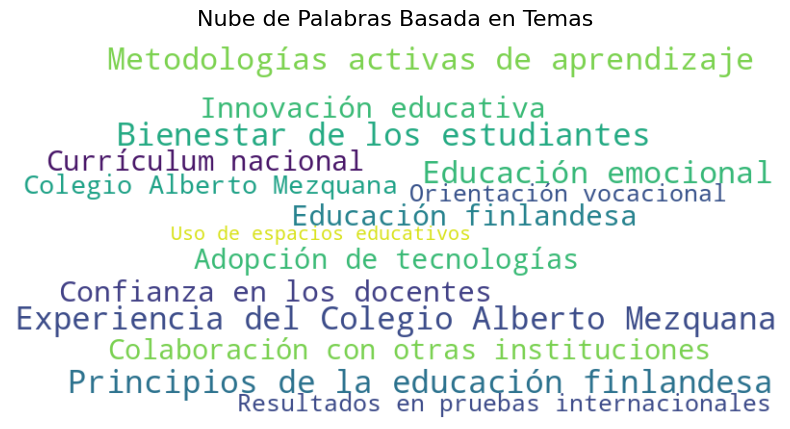

In [50]:
!pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud_from_topics(data):
    """
    Genera una nube de palabras basada en los temas y sus pesos.
    """
    # Crear un diccionario con temas y pesos
    topic_weights = {source: weight for source, _, weight in data}
    topic_weights.update({target: weight for _, target, weight in data})

    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(topic_weights)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nube de Palabras Basada en Temas", fontsize=16)
    plt.show()

# Generar la nube de palabras
generate_wordcloud_from_topics(relations_data)


## Mapa de Calor: Relación Entre Temas
Un mapa de calor (heatmap) muestra cómo de fuertes son las relaciones entre temas principales y secundarios.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



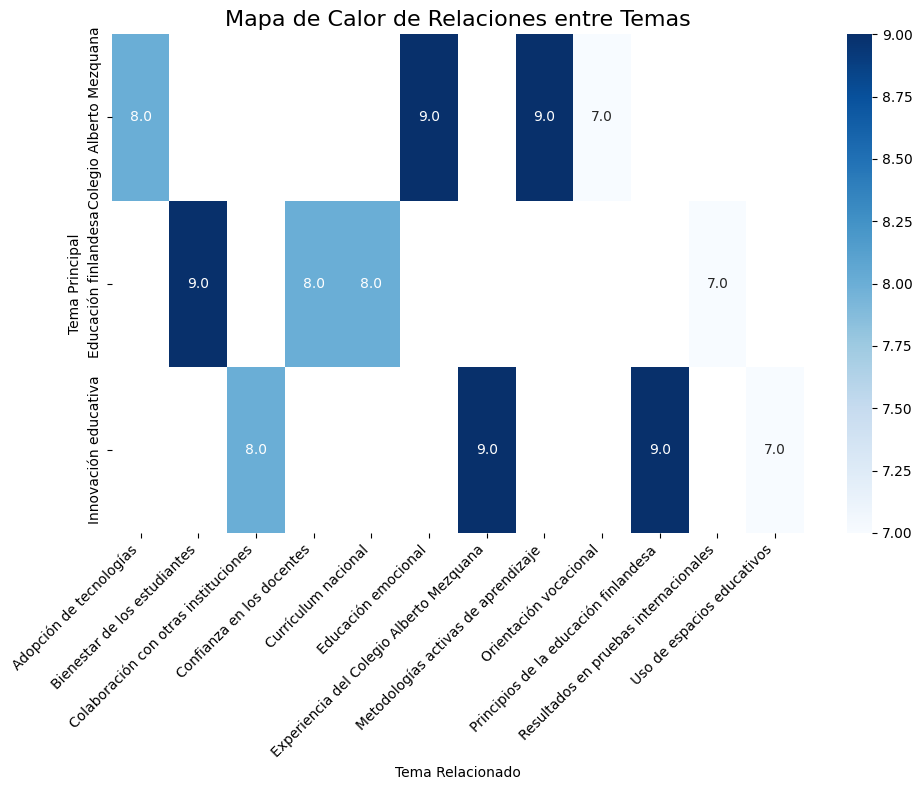

In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def create_heatmap(data):
    """
    Genera un mapa de calor para visualizar las relaciones entre temas.
    """
    # Crear un DataFrame a partir de los datos
    df = pd.DataFrame(data, columns=["Tema Principal", "Tema Relacionado", "Peso"])

    # Pivotar la tabla para crear la matriz
    matrix = df.pivot(index="Tema Principal", columns="Tema Relacionado", values="Peso")

    # Crear el mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt=".1f")
    plt.title("Mapa de Calor de Relaciones entre Temas", fontsize=16)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Generar el mapa de calor
create_heatmap(relations_data)


# Interpretación del Mapa de Calor: Relaciones entre Temas

El mapa de calor ilustra las relaciones entre los principales temas extraídos del discurso, junto con su relevancia representada por los pesos. Los valores más altos indican una relación más fuerte o relevante entre los temas. A continuación, se detalla la interpretación de los datos:

---

## **1. Temas Clave y Relaciones Dominantes**
- **"Innovación educativa"** muestra fuertes relaciones con:
  - **"Principios de la educación finlandesa"** (peso: 9.0), reflejando cómo la innovación en la educación está influenciada por los principios de un sistema educativo reconocido globalmente.
  - **"Colaboración con otras instituciones"** (peso: 8.0), indicando que la innovación requiere esfuerzos conjuntos y alianzas estratégicas.
  - **"Uso de espacios educativos"** (peso: 7.0), lo que sugiere que el diseño y la utilización de espacios físicos son fundamentales en la implementación de ideas innovadoras.

- **"Educación finlandesa"** destaca con relaciones significativas hacia:
  - **"Resultados en pruebas internacionales"** (peso: 9.0), subrayando la efectividad del sistema educativo finlandés en contextos globales.
  - **"Bienestar de los estudiantes"** (peso: 9.0), enfatizando el enfoque centrado en el estudiante como pilar del éxito educativo.
  - **"Confianza en los docentes"** (peso: 8.0) y **"Currículum nacional"** (peso: 8.0), reflejando la autonomía y preparación docente como elementos esenciales.

- **"Colegio Alberto Mezquana"** resalta con relaciones importantes hacia:
  - **"Educación emocional"** (peso: 9.0), lo que evidencia la prioridad del desarrollo socioemocional en su enfoque.
  - **"Metodologías activas de aprendizaje"** (peso: 9.0), destacando su uso de estrategias dinámicas en el aula.
  - **"Adopción de tecnologías"** (peso: 8.0), reflejando la integración de herramientas digitales en la enseñanza.

---

## **2. Patrón General**
- Los temas principales (filas) tienen múltiples relaciones fuertes (valores altos) con temas relacionados (columnas), lo que muestra un enfoque integral donde la innovación, la educación emocional y los principios finlandeses se interconectan.
- La **intensidad de las relaciones** está más concentrada en valores altos (7.0 - 9.0), sugiriendo que las conexiones entre estos temas son de alta relevancia en el contexto del discurso analizado.

---

## **3. Implicaciones Educativas**
- **Interconexión temática:** La innovación educativa depende de una combinación de factores, incluidos la adopción tecnológica, el bienestar estudiantil y las metodologías activas.
- **Relevancia del sistema finlandés:** Los principios y prácticas finlandesas sirven como modelo para desarrollar sistemas educativos más efectivos y centrados en los estudiantes.
- **Importancia de la colaboración:** La innovación y los logros educativos se fortalecen mediante la cooperación entre instituciones y una confianza significativa en los docentes.

---

## **Conclusión**
El mapa de calor revela un ecosistema educativo interconectado donde los principales temas se refuerzan mutuamente. La innovación no se percibe como un esfuerzo aislado, sino como un proceso integrado que involucra bienestar, tecnología, colaboración y metodologías activas. Estos hallazgos pueden servir como guía para implementar estrategias educativas más efectivas y centradas en el estudiante.


## Análisis Temporal: Evolución de Temas
Si tu discurso está dividido en segmentos temporales (e.g., minutos o secciones), puedes analizar cómo evolucionan los temas a lo largo del tiempo.



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



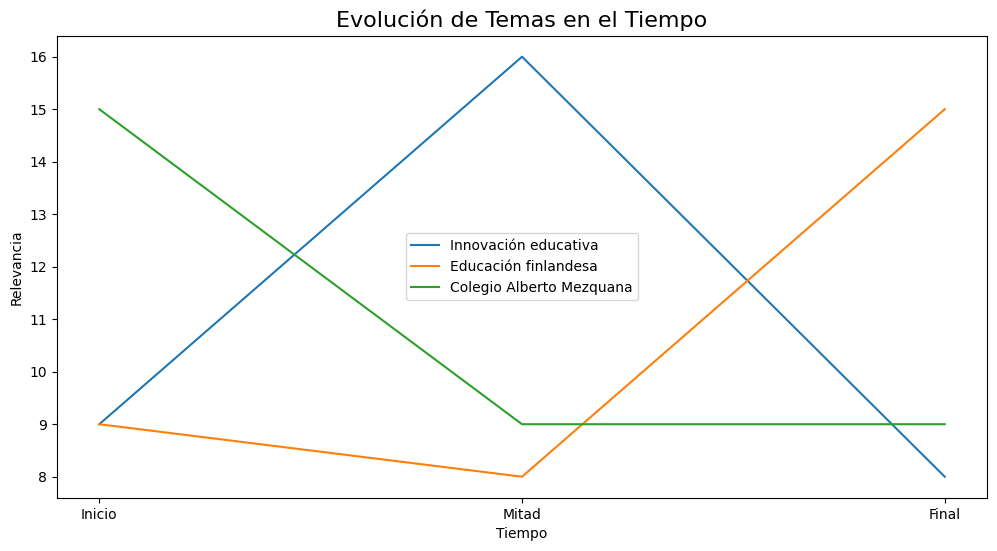

In [58]:
import matplotlib.pyplot as plt

def plot_topic_evolution(data, timestamps):
    """
    Visualiza la evolución de los temas principales en el tiempo.
    """
    # Crear un diccionario para contar la aparición de temas por timestamp
    topic_evolution = {topic: [0] * len(timestamps) for topic, _, _ in data}

    # Llenar el diccionario con datos
    for i, (topic, _, weight) in enumerate(data):
        topic_evolution[topic][i % len(timestamps)] += weight

    # Graficar la evolución
    plt.figure(figsize=(12, 6))
    for topic, values in topic_evolution.items():
        plt.plot(timestamps, values, label=topic)

    plt.title("Evolución de Temas en el Tiempo", fontsize=16)
    plt.xlabel("Tiempo")
    plt.ylabel("Relevancia")
    plt.legend()
    plt.show()

# Ejemplo de timestamps (ajusta según tu análisis)
timestamps = ["Inicio", "Mitad", "Final"]
plot_topic_evolution(relations_data, timestamps)


## Árbol Jerárquico: Relación Principal-Secundaria
Visualiza los temas en forma de árbol jerárquico, con los temas principales como nodos padres y los secundarios como hijos

In [60]:
!pip install plotly

import plotly.graph_objects as go

def create_tree_map(data):
    """
    Genera un árbol jerárquico para mostrar relaciones entre temas.
    """
    # Crear listas para las etiquetas y sus padres
    labels = []
    parents = []
    values = []

    # Crear una estructura jerárquica única
    for source, target, weight in data:
        if source not in labels:
            labels.append(source)
            parents.append("")  # Los nodos raíz no tienen padres
            values.append(0)  # Los nodos raíz no tienen peso directo

        labels.append(target)
        parents.append(source)
        values.append(weight)

    # Crear la figura del árbol jerárquico
    fig = go.Figure(go.Treemap(
        labels=labels,
        parents=parents,
        values=values
    ))

    # Ajustar el diseño del gráfico
    fig.update_layout(
        title="Árbol Jerárquico de Temas",
        title_font_size=18,
        margin=dict(t=50, l=25, r=25, b=25)
    )

    fig.show()

# Crear el árbol jerárquico
create_tree_map(relations_data)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Predicciones y Análisis Contextual:
Usa un modelo de lenguaje para:

Generar predicciones sobre el impacto de los temas en el contexto del discurso (e.g., "¿Cómo impactará X en la educación?").

Identificar conexiones ocultas entre temas que no son evidentes en el análisis inicial.

In [62]:
from anthropic import Anthropic

def generate_additional_insights(text, relations_data):
    """
    Genera insights adicionales basados en texto y datos de relaciones usando Claude.

    Args:
        text (str): El texto de la transcripción a analizar
        relations_data (str): Datos sobre relaciones y tópicos

    Returns:
        str: Insights generados por Claude
    """
    # Inicializar el cliente de Anthropic
    anthropic = Anthropic()

    # Crear el prompt
    prompt = f"""
    Basado en los siguientes tópicos y relaciones, proporciona insights o predicciones adicionales:
    {relations_data}

    Los insights deben incluir:
    1. Conexiones ocultas entre tópicos.
    2. Tendencias futuras relacionadas con estos tópicos.
    3. Recomendaciones para exploración adicional.

    Transcripción:
    {text}
    """

    try:
        # Realizar la llamada a la API
        response = anthropic.messages.create(
            model="claude-3-5-sonnet-20241022",
            max_tokens=1000,
            messages=[{
                "role": "user",
                "content": prompt
            }]
        )

        # Extraer el contenido de la respuesta
        return response.content[0].text

    except Exception as e:
        print(f"Error al generar insights: {str(e)}")
        return None

# Ejemplo de uso
try:
    additional_insights = generate_additional_insights(transcription_text, relations_data)
    if additional_insights:
        print("Insights Adicionales:\n", additional_insights)
    else:
        print("No se pudieron generar insights")
except Exception as e:
    print(f"Error en el proceso: {str(e)}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Insights Adicionales:
 Basado en la conversación, aquí están los insights y predicciones solicitados:

1. Conexiones ocultas entre tópicos:

- Existe una fuerte relación entre el bienestar emocional y el rendimiento académico. Tanto en Finlandia como en el Colegio Alberto Mezquana, el foco en la educación emocional y el bienestar estudiantil precede a los logros académicos.

- La innovación tecnológica y la educación emocional no son excluyentes, sino complementarias. El caso del Colegio Alberto Mezquana demuestra cómo se pueden integrar ambos aspectos.

- La autonomía docente y la confianza institucional están directamente relacionadas con la capacidad de innovación en el aula.

2. Tendencias futuras:

- Mayor integración de espacios flexibles y multifuncionales en las escuelas, superando el modelo tradicional de aulas fijas.

- Incremento en el uso de tecnologías como herramientas de personalización del aprendizaje, especialmente la inteligencia artificial.

- Evolución hacia modelos